# Projeto de INF1032

## Análise do Mercado Financeiro durante a pandemia.

### Passos:

● Coletar os dados da empresa Orama Investimentos.

● Fazer uma análise do mercado financeiro durante as crises,
comparando com os dados de 2020 e 2009.

● Identificar se existirá um crescimento das ações para os próximos mês depois da pandemia através de um modelo de classificação.

### Alunos: Barbara Herrera, Geam Morales e Nathalia Inácio

## Imports

In [1]:
import pandas as pd
import dataframe_image as dfi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from re import sub
from decimal import Decimal


# Ocultando Warnings indesejados
import warnings
warnings.filterwarnings('ignore')

# Pandemia 2009

## Lendo arquivo cotação 2009

In [2]:
data_url = '2009_Cotação.csv'
data_2009 = pd.read_csv(data_url, header='infer', error_bad_lines=False, sep=';',)
print("Total de Linhas: ",data_2009.shape[0])
data_2009.head()

Total de Linhas:  5845


,Empresa,Abertura,Mês,Segmento
0,ABC BRASIL,"204,3",1,Serviços Bancários
1,ABC BRASIL,"145,84",2,Serviços Bancários
2,ABC BRASIL,"161,96",3,Serviços Bancários
3,ABC BRASIL,"245,22",4,Serviços Bancários
4,ABC BRASIL,"230,27",5,Serviços Bancários


## Fazendo transposição

In [3]:
data_2009 = data_2009.pivot(index=['Segmento', 'Empresa'], columns='Mês', values='Abertura')
data_2009.head()

Mês                                    1       2       3       4       5   \
Segmento              Empresa                                               
Agricultura           M.DIASBRANC  716,76  527,99   626,8  648,13  1004,9   
                      SAO MARTINH  459,42  427,82  497,24  506,13  659,76   
                      SLC AGRICOL  596,13  456,43  591,26  603,37   637,7   
Alimentos Processados BRF FOODS       NaN     NaN     NaN     NaN     NaN   
                      BRFS            NaN     NaN     NaN     NaN     NaN   

Mês                                     6        7        8        9   \
Segmento              Empresa                                           
Agricultura           M.DIASBRANC  1016,75  1289,17  1333,14  1314,88   
                      SAO MARTINH   734,02   832,45   912,14   862,22   
                      SLC AGRICOL   890,44   919,39  1102,16   960,12   
Alimentos Processados BRF FOODS        NaN   2921,9  4014,35  3612,52   
                      BRFS             NaN      NaN      NaN      NaN   

Mês                                     10       11       12  
Segmento              Empresa                                 
Agricultura           M.DIASBRANC  1409,28  1260,86  1750,96  
                      SAO MARTINH   960,29   774,42  1346,66  
                      SLC AGRICOL   1266,2   824,58   828,96  
Alimentos Processados BRF FOODS    4712,98  6512,78   6198,3  
                      BRFS             NaN      NaN     0,61

In [4]:
data_2009.to_csv('2009.csv')

## Visualizando nova tabela transposta

In [5]:
data_url = '2009.csv'
data_2009 = pd.read_csv(data_url, header='infer', error_bad_lines=False, sep=',',)
print("Total de Linhas: ",data_2009.shape[0])
data_2009.head()

Total de Linhas:  721


,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
0,Agricultura,M.DIASBRANC,"716,76","527,99","626,8","648,13","1004,9","1016,75","1289,17","1333,14","1314,88","1409,28","1260,86","1750,96"
1,Agricultura,SAO MARTINH,"459,42","427,82","497,24","506,13","659,76","734,02","832,45","912,14","862,22","960,29","774,42","1346,66"
2,Agricultura,SLC AGRICOL,"596,13","456,43","591,26","603,37","637,7","890,44","919,39","1102,16","960,12","1266,2","824,58","828,96"
3,Alimentos Processados,BRF FOODS,NaN,NaN,NaN,NaN,NaN,NaN,"2921,9","4014,35","3612,52","4712,98","6512,78","6198,3"
4,Alimentos Processados,BRFS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,61"


## Tratando e convertendo os dados de valores

In [6]:
for month in range(1, 13): 
    data_2009[str(month)] = data_2009[str(month)].str.replace('.','')
    data_2009[str(month)] = data_2009[str(month)].str.replace(',','.')
    data_2009[str(month)] = data_2009[str(month)].astype(float)

data_2009.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
0,Agricultura,M.DIASBRANC,716.76,527.99,626.80,648.13,1004.90,1016.75,1289.17,1333.14,1314.88,1409.28,1260.86,1750.96
1,Agricultura,SAO MARTINH,459.42,427.82,497.24,506.13,659.76,734.02,832.45,912.14,862.22,960.29,774.42,1346.66
2,Agricultura,SLC AGRICOL,596.13,456.43,591.26,603.37,637.70,890.44,919.39,1102.16,960.12,1266.20,824.58,828.96
3,Alimentos Processados,BRF FOODS,NaN,NaN,NaN,NaN,NaN,NaN,2921.90,4014.35,3612.52,4712.98,6512.78,6198.30
4,Alimentos Processados,BRFS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.61


## Maiores valores de abertura das empresas em 2009

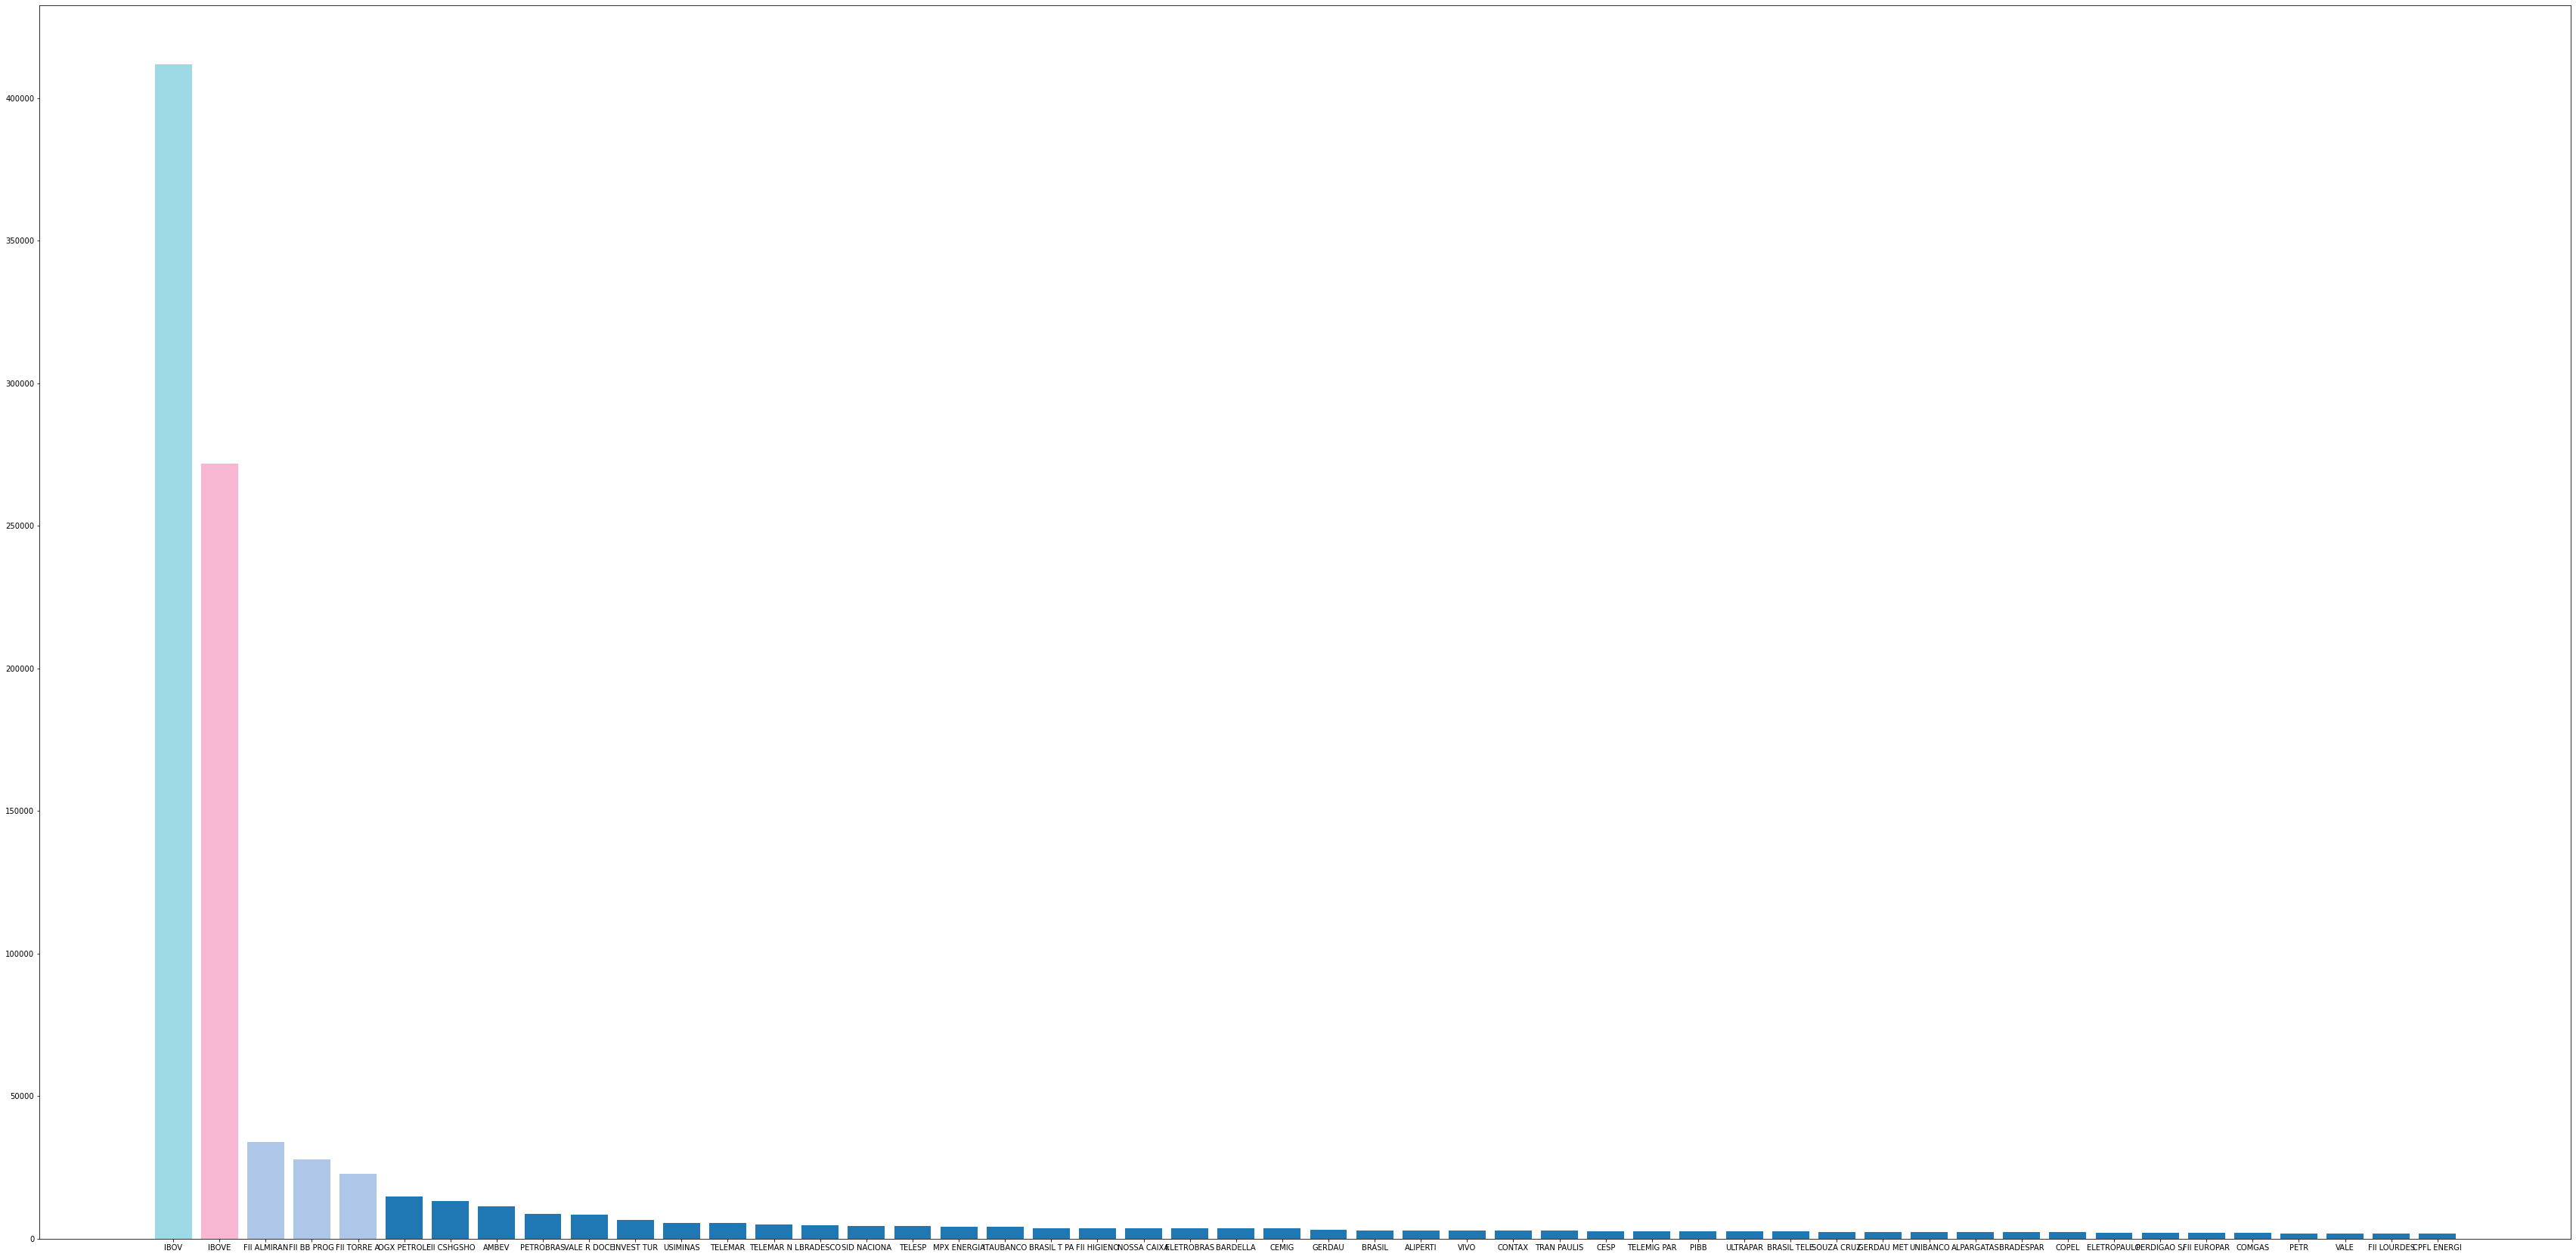

In [7]:
data_2009_largest_abertura = data_2009.nlargest(50, '1')

empresa = data_2009_largest_abertura['Empresa']
janeiro = data_2009_largest_abertura['1']


my_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, janeiro, color=my_cmap(rescale(janeiro)))
plt.show()

## Menores valores de abertura das empresas em 2009

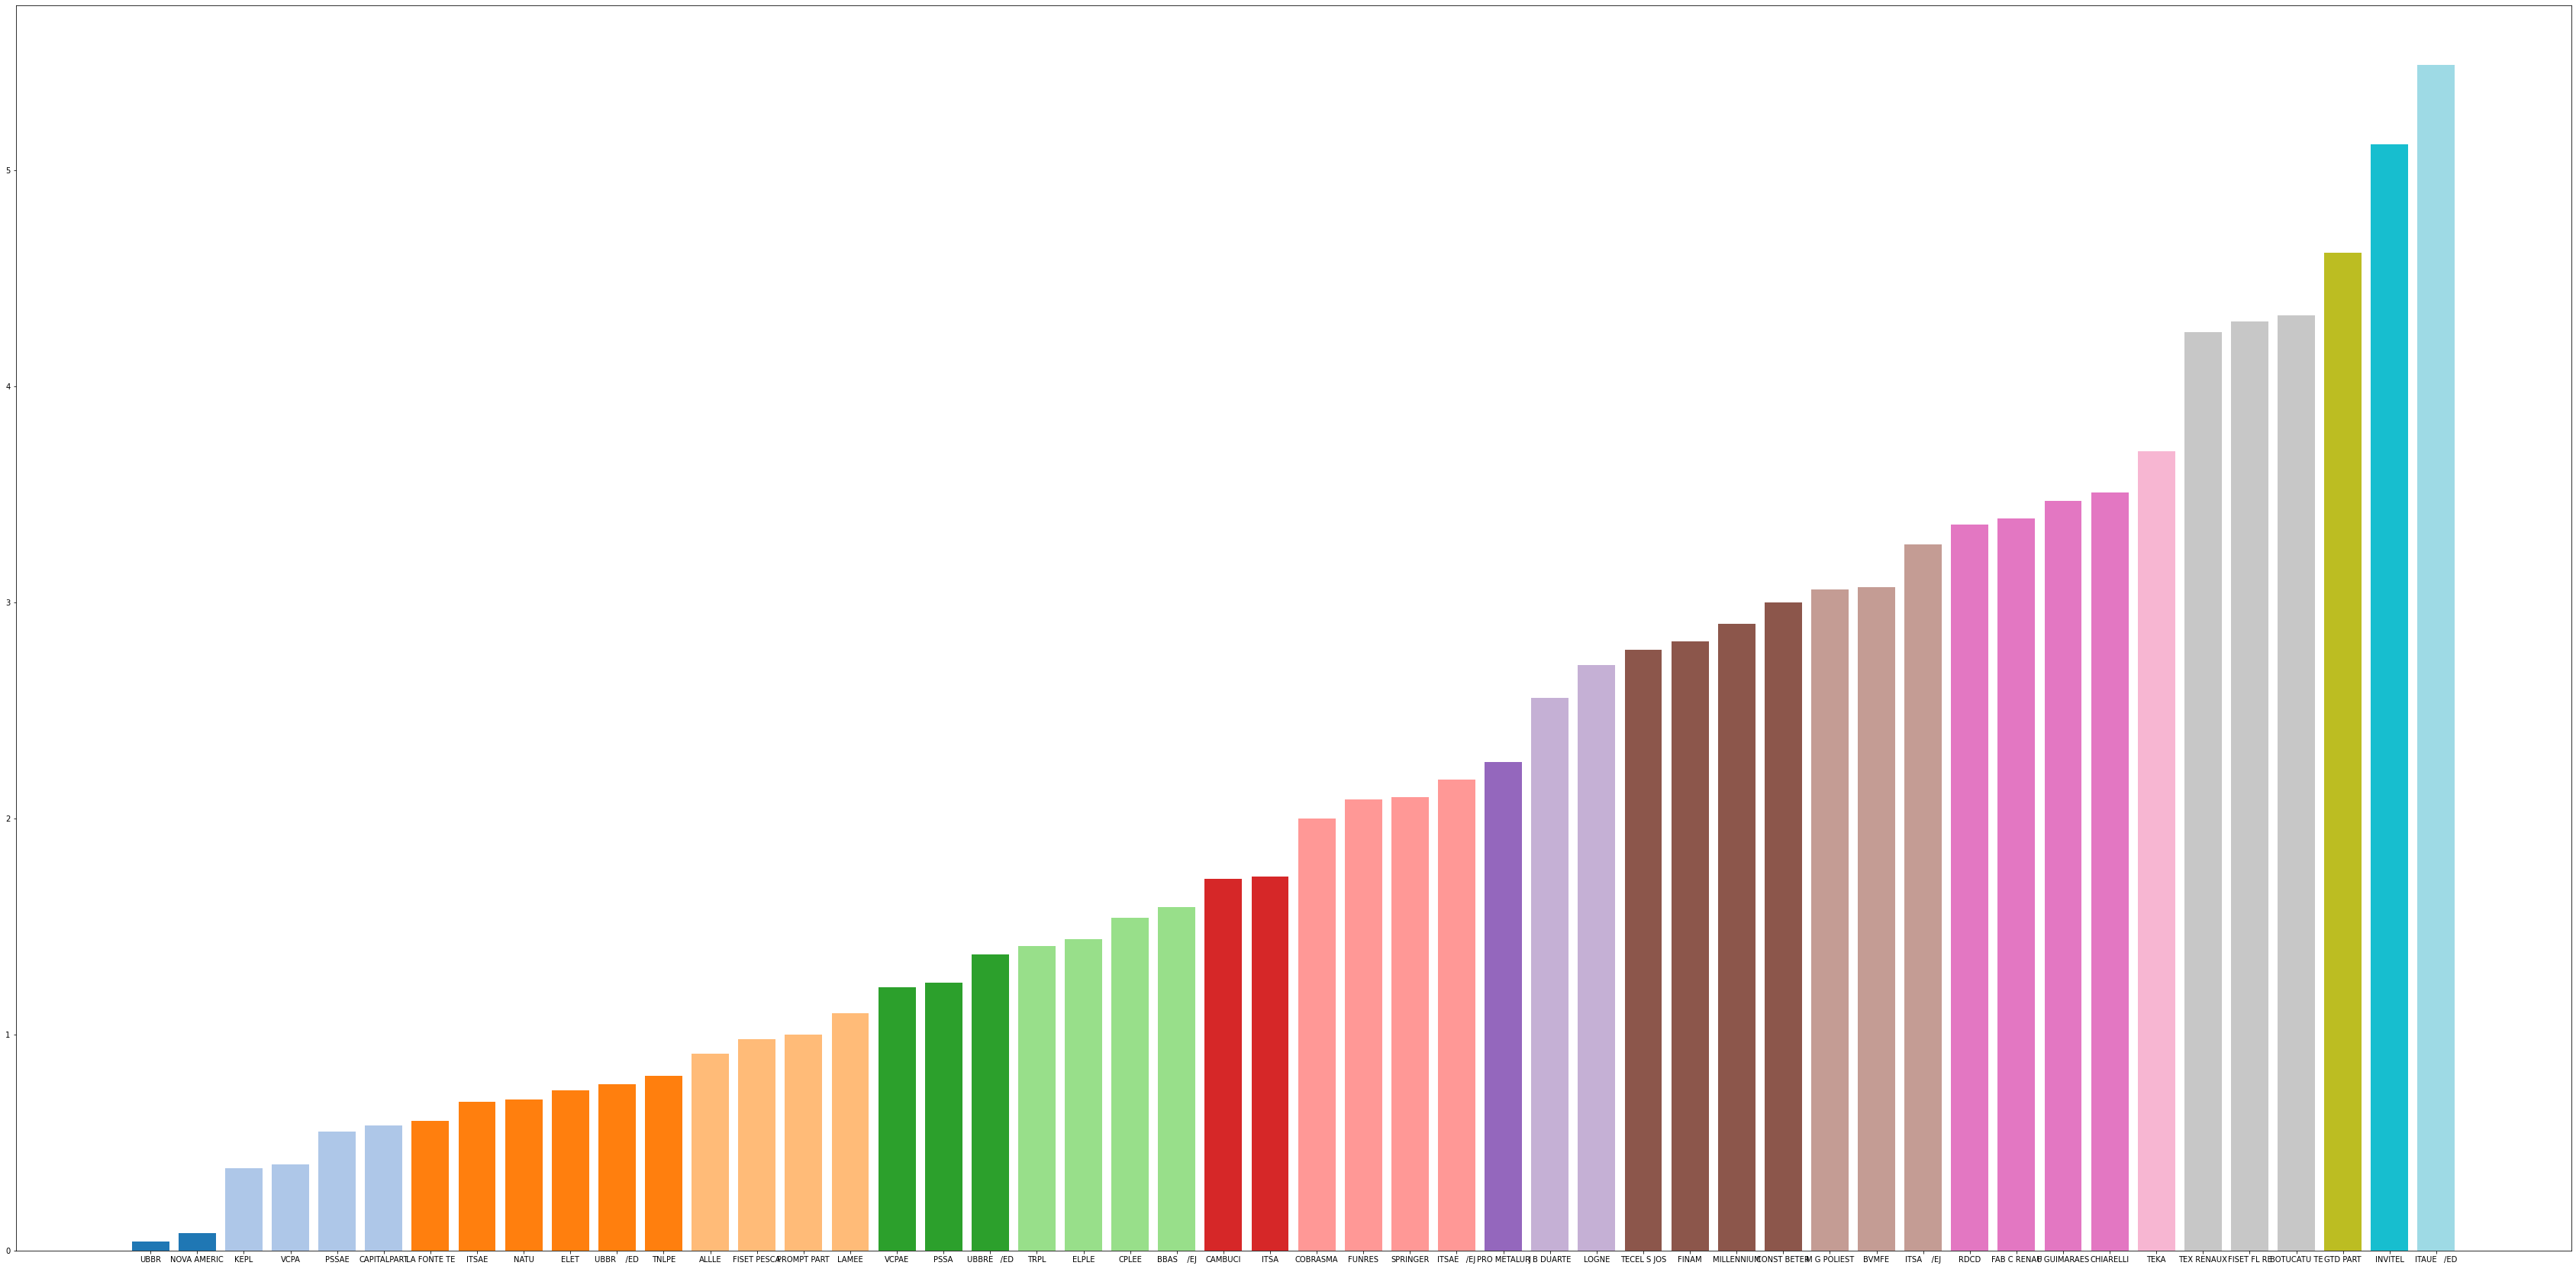

In [8]:
data_2009_lowest_abertura = data_2009.nsmallest(50, '1')

empresa = data_2009_lowest_abertura['Empresa']
janeiro = data_2009_lowest_abertura['1']

my_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, janeiro, color=my_cmap(rescale(janeiro)))
plt.show()

## Menores valores de abertura dos segmentos em 2009

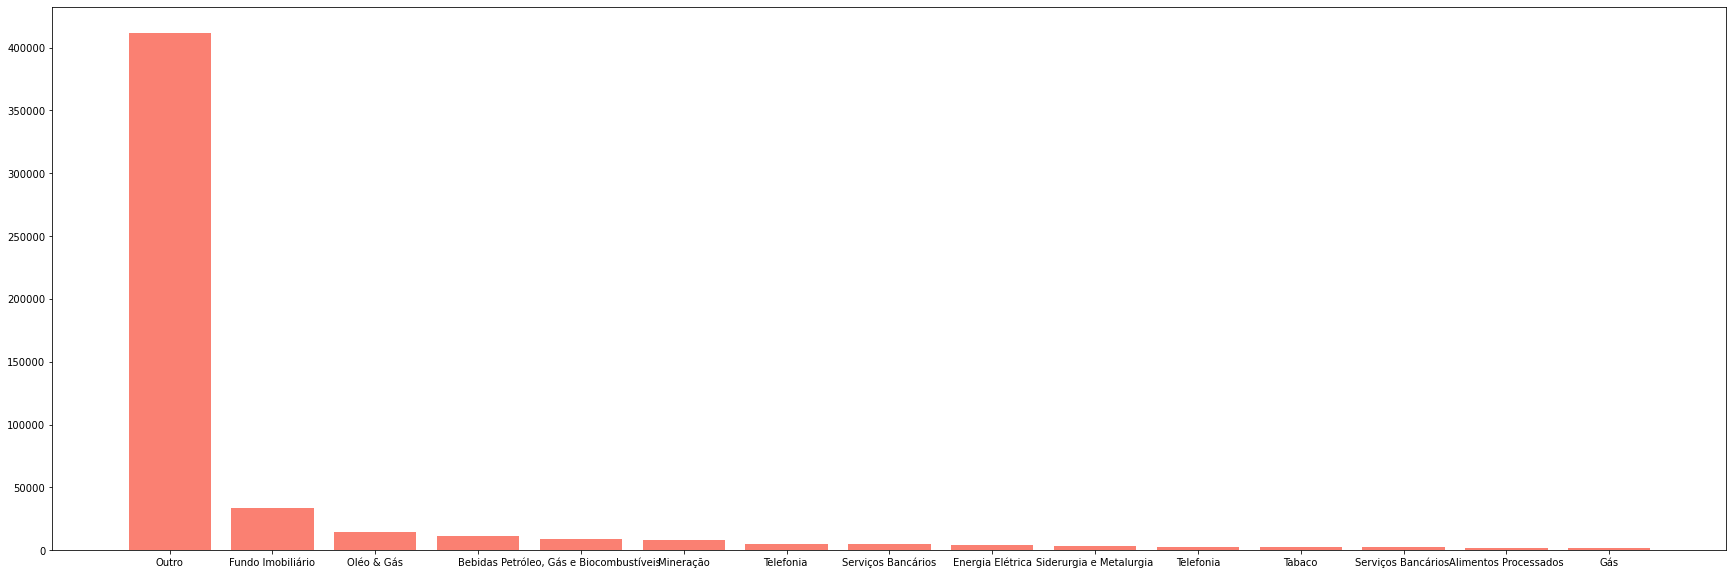

In [9]:
data_2009_largest_abertura = data_2009.nlargest(50, '1')

segmento = data_2009_largest_abertura['Segmento']
janeiro = data_2009_largest_abertura['1']

fig = plt.figure(figsize =(30, 10))
plt.bar(segmento, janeiro, facecolor = 'salmon')
plt.show()

## Maiores valores de abertura dos segmentos em 2009

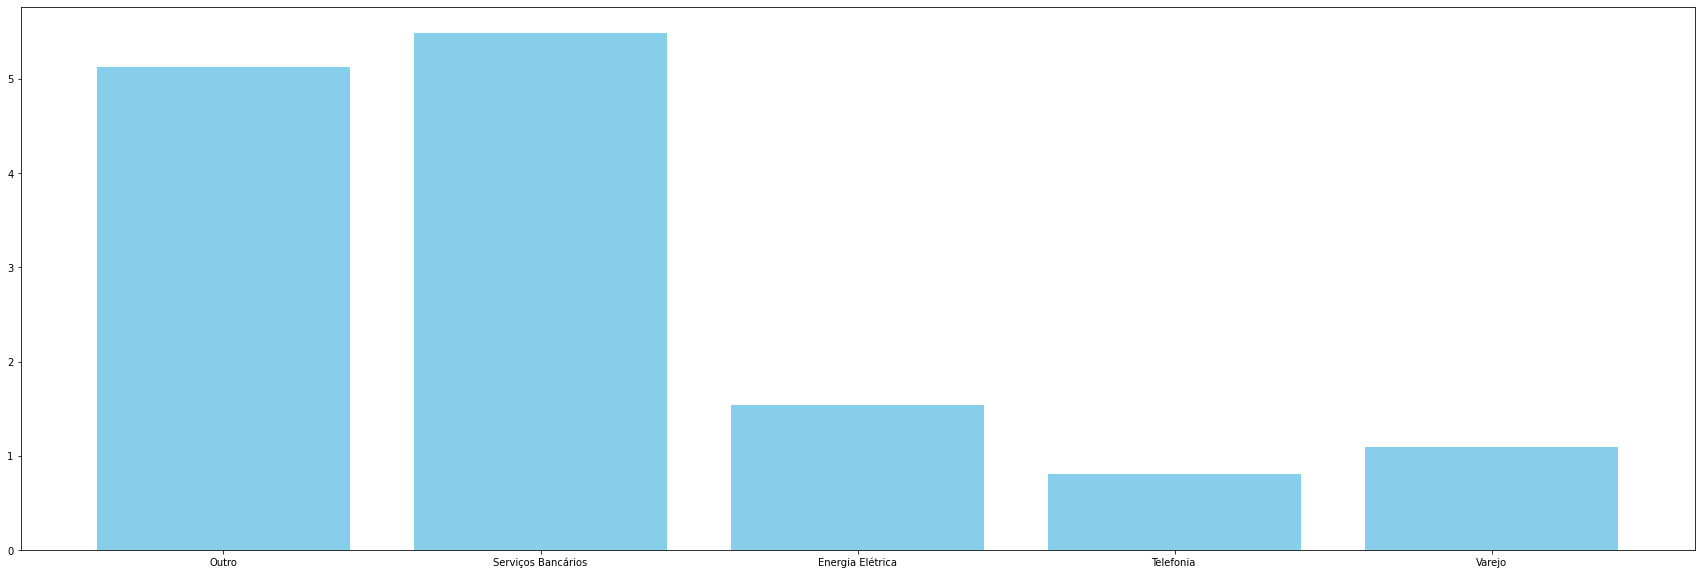

In [10]:
data_2009_lowest_abertura = data_2009.nsmallest(50, '1')

segmento = data_2009_lowest_abertura['Segmento']
janeiro = data_2009_lowest_abertura['1']

fig = plt.figure(figsize =(30, 10))
plt.bar(segmento, janeiro, facecolor = 'skyblue')
plt.show()

## Maiores valores de fechamento das empresas em 2009

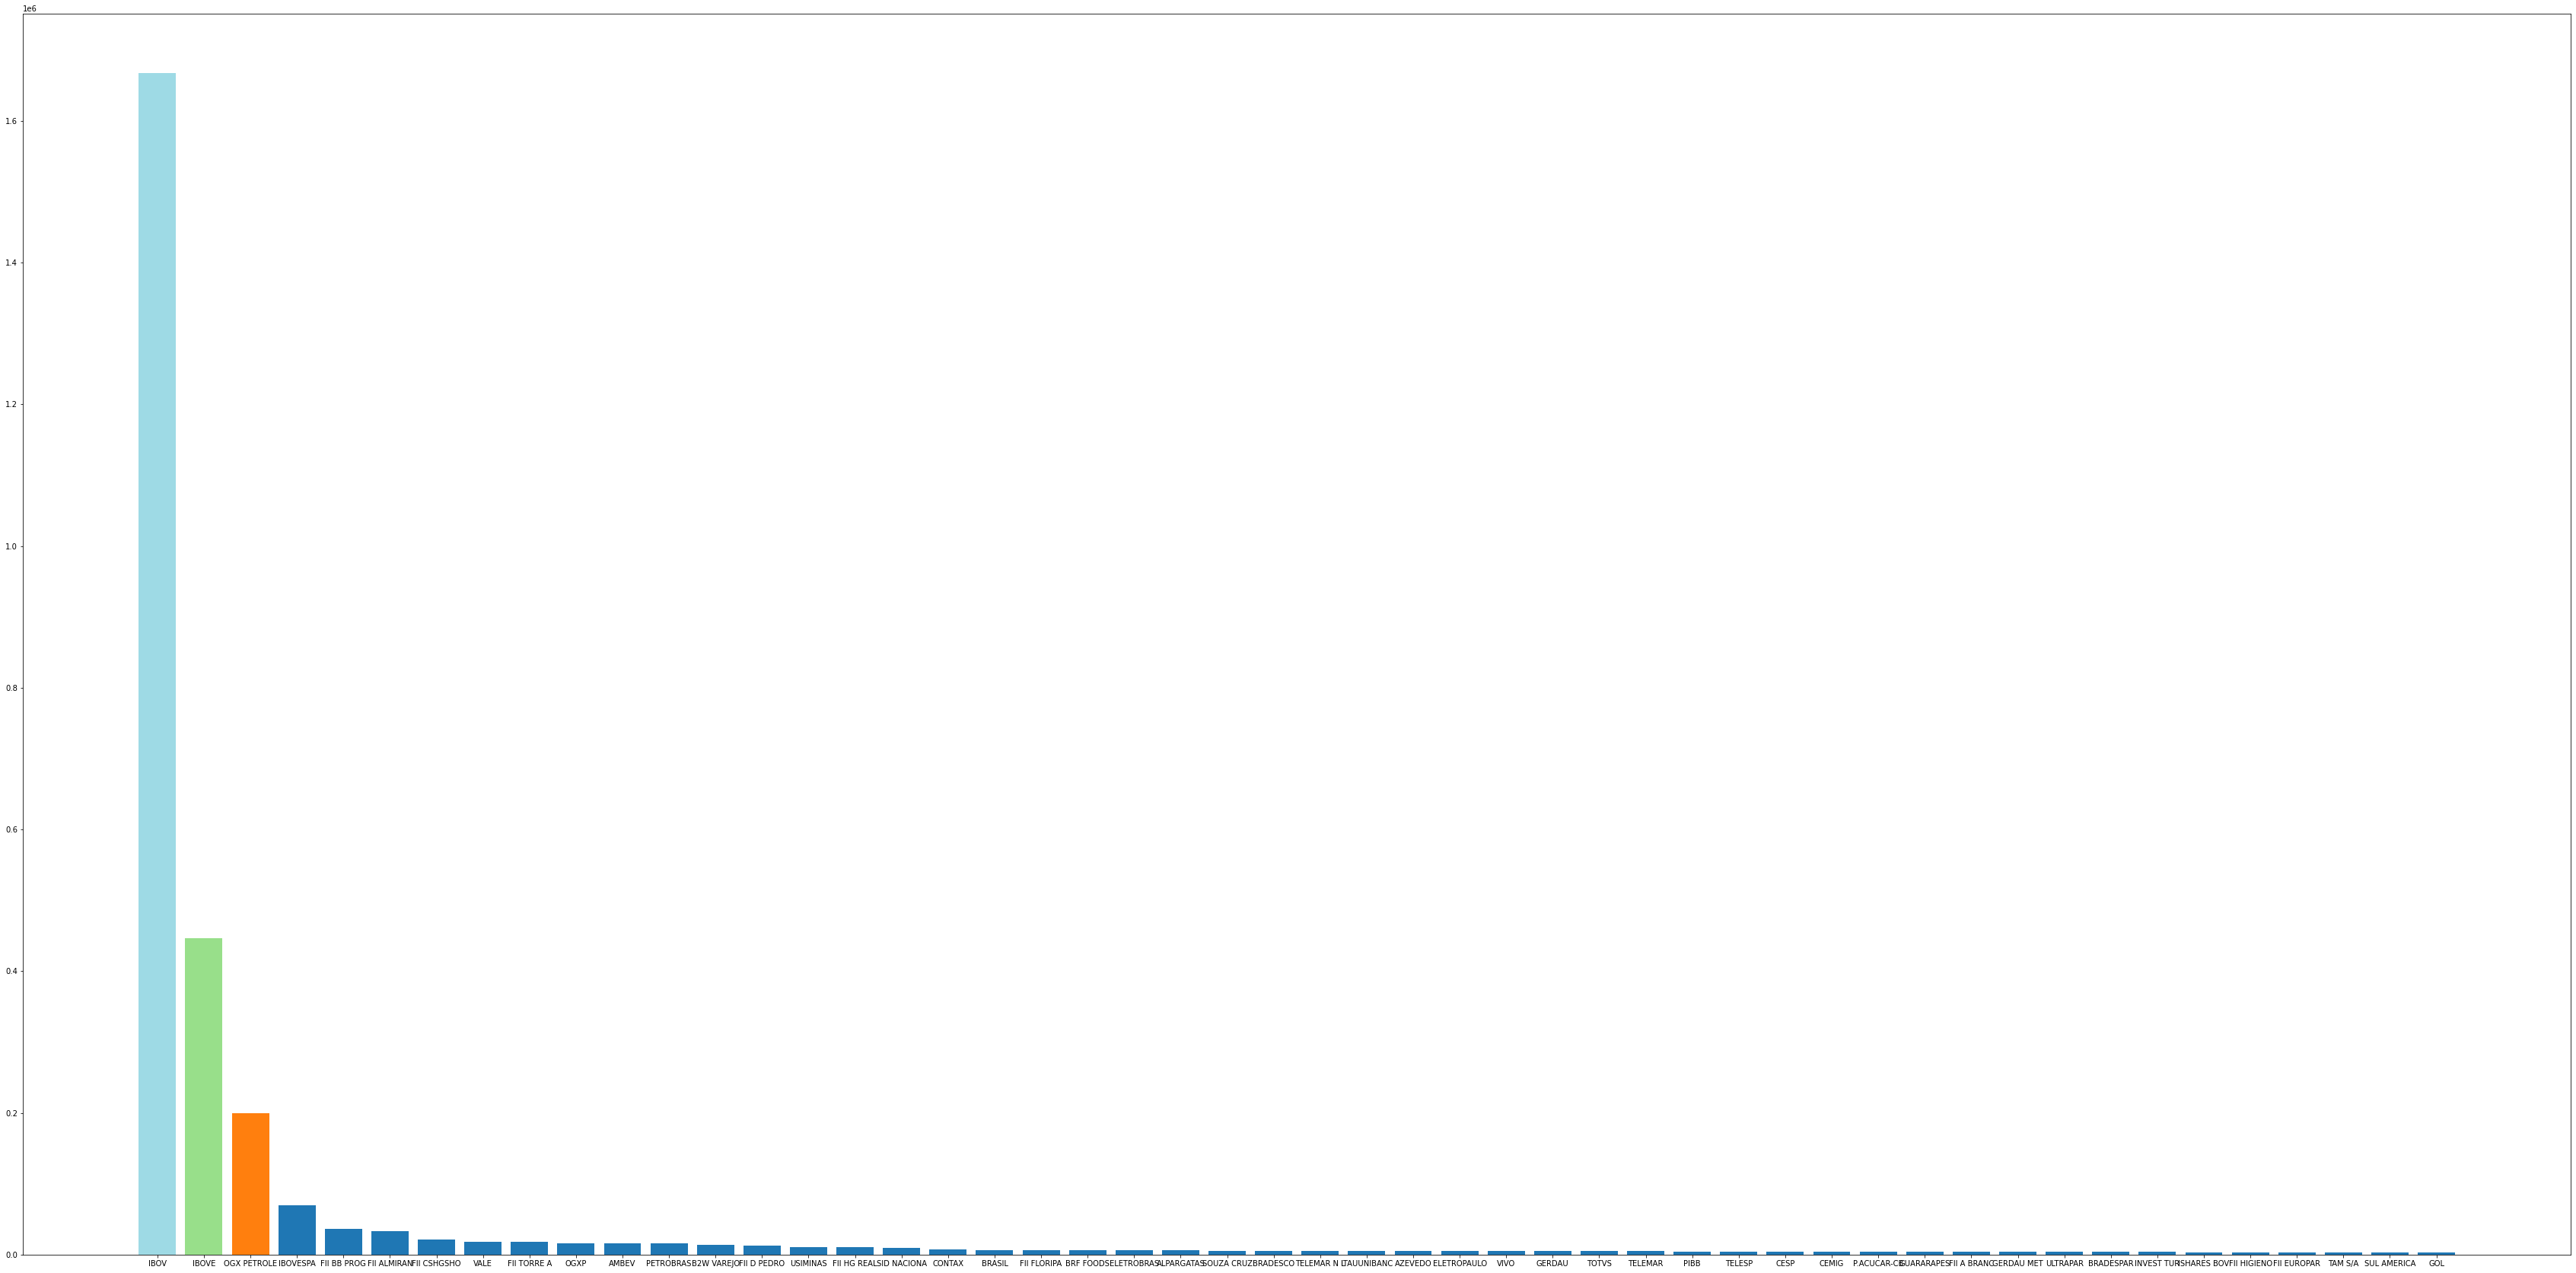

In [11]:
data_2009_largest_fechamento = data_2009.nlargest(50, '12')

empresa = data_2009_largest_fechamento['Empresa']
dezembro = data_2009_largest_fechamento['12']

my_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, dezembro, color=my_cmap(rescale(dezembro)))
plt.show()

## Menores valores de fechamento das empresas em 2009

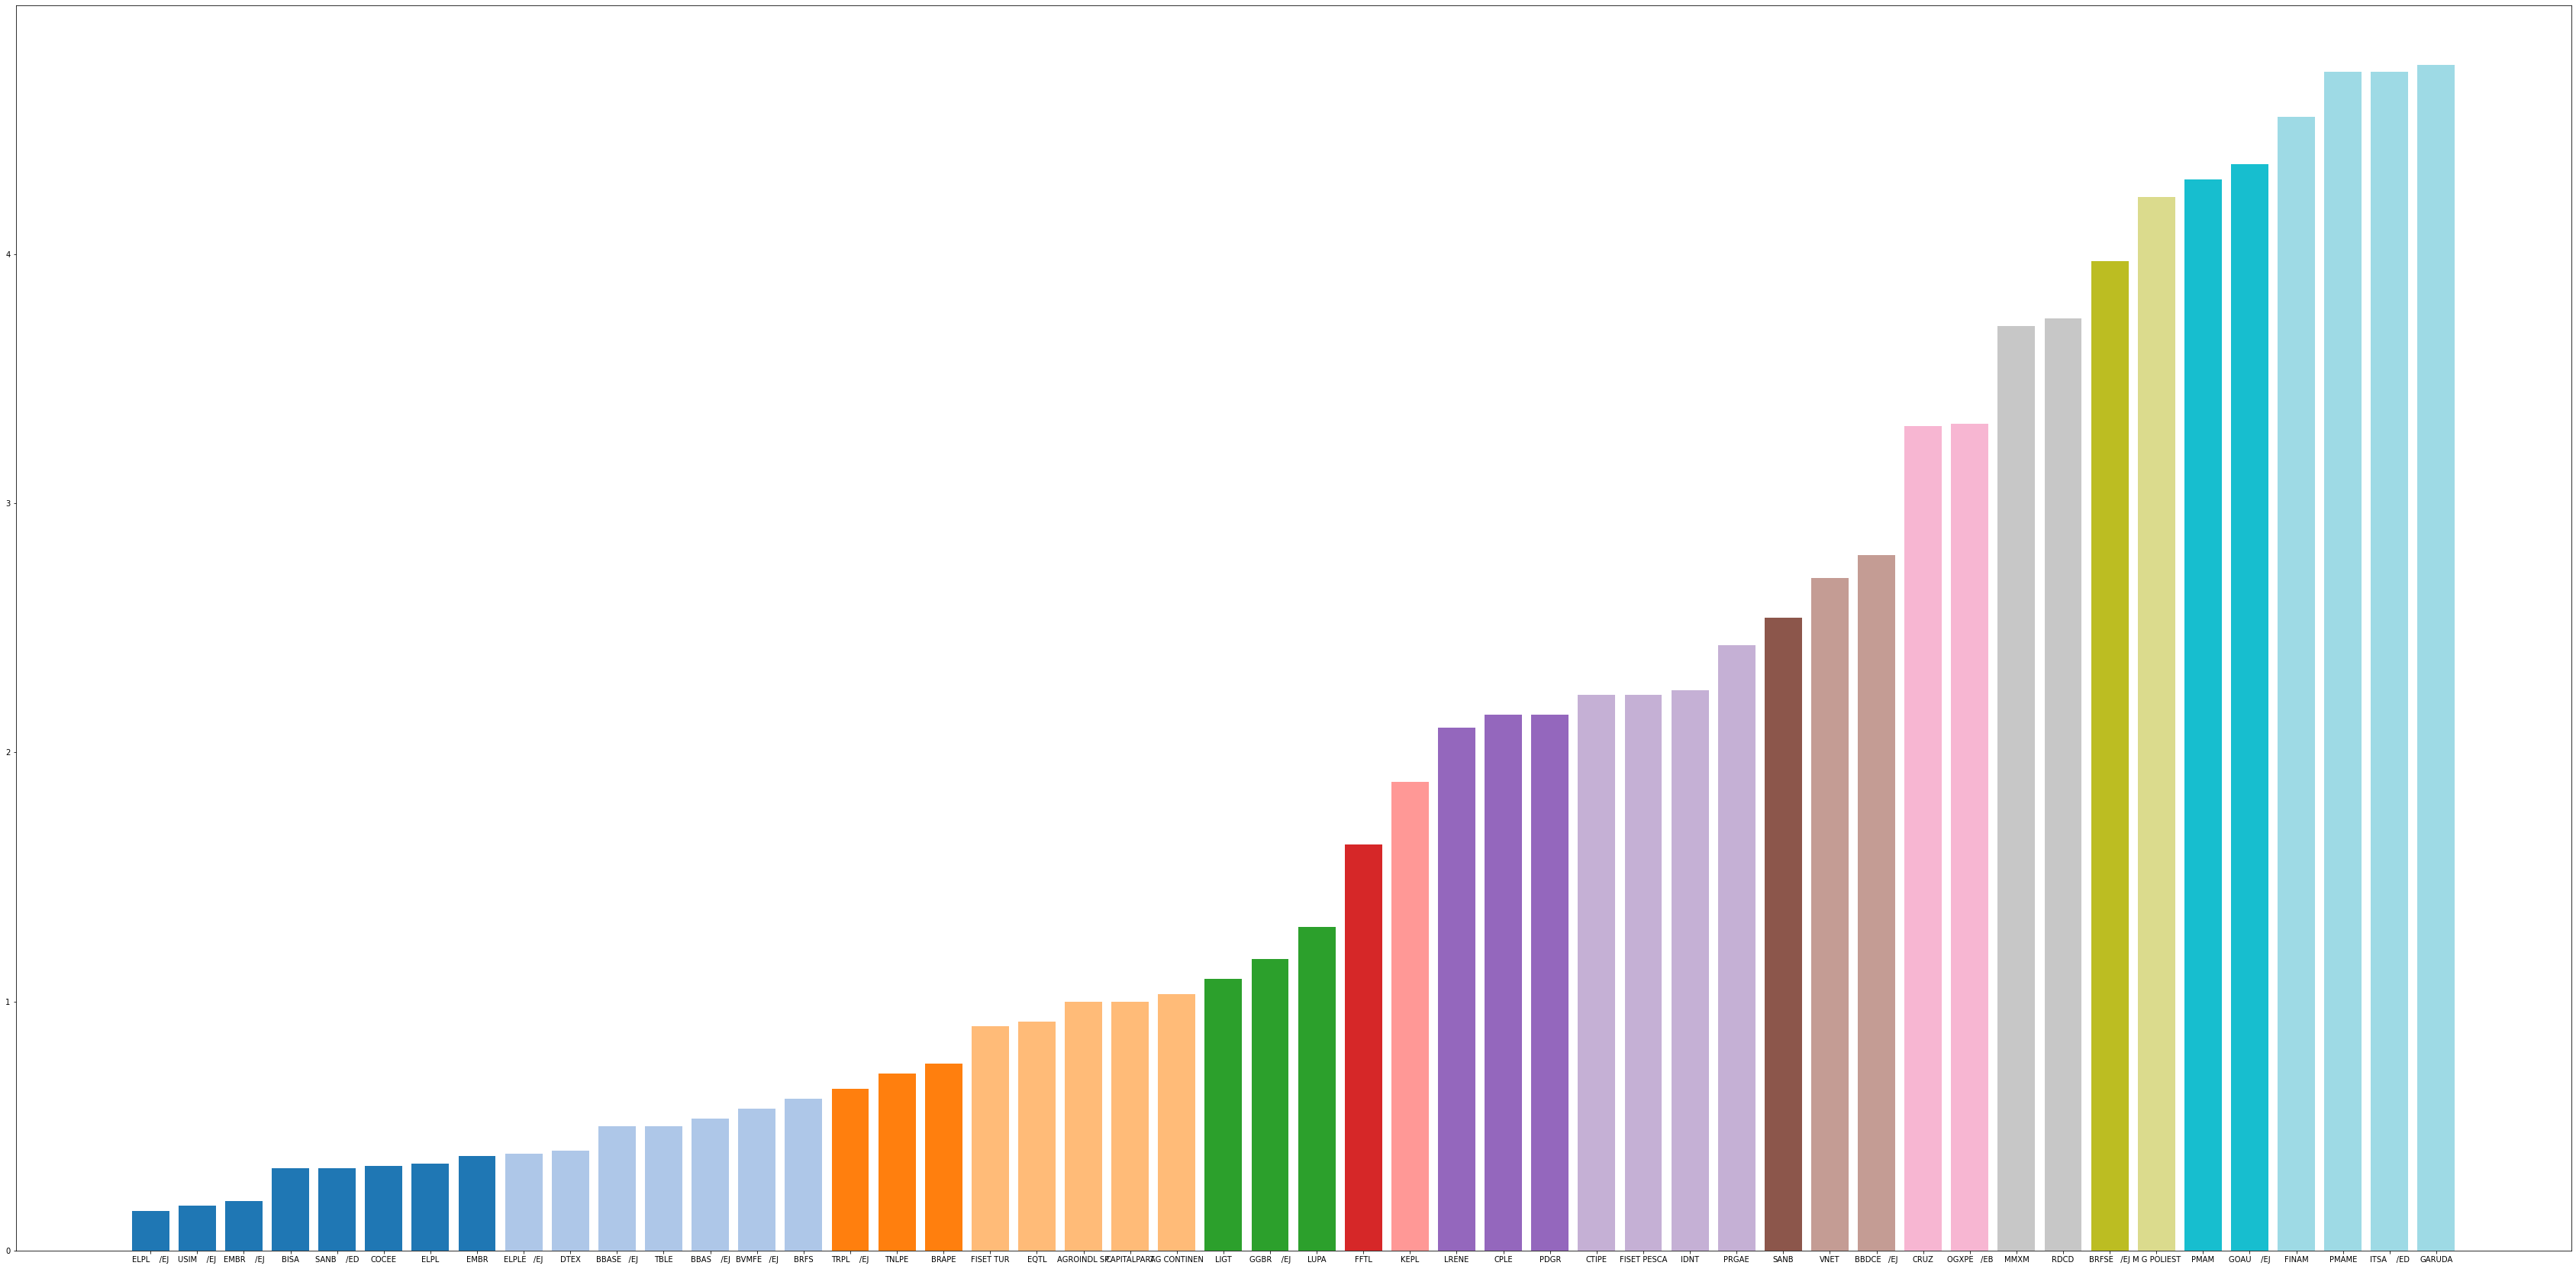

In [12]:
data_2009_lowest_fechamento = data_2009.nsmallest(50, '12')

empresa = data_2009_lowest_fechamento['Empresa']
dezembro = data_2009_lowest_fechamento['12']

my_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, dezembro, color=my_cmap(rescale(dezembro)))
plt.show()

## Maiores valores de fechamento dos segmentos em 2009

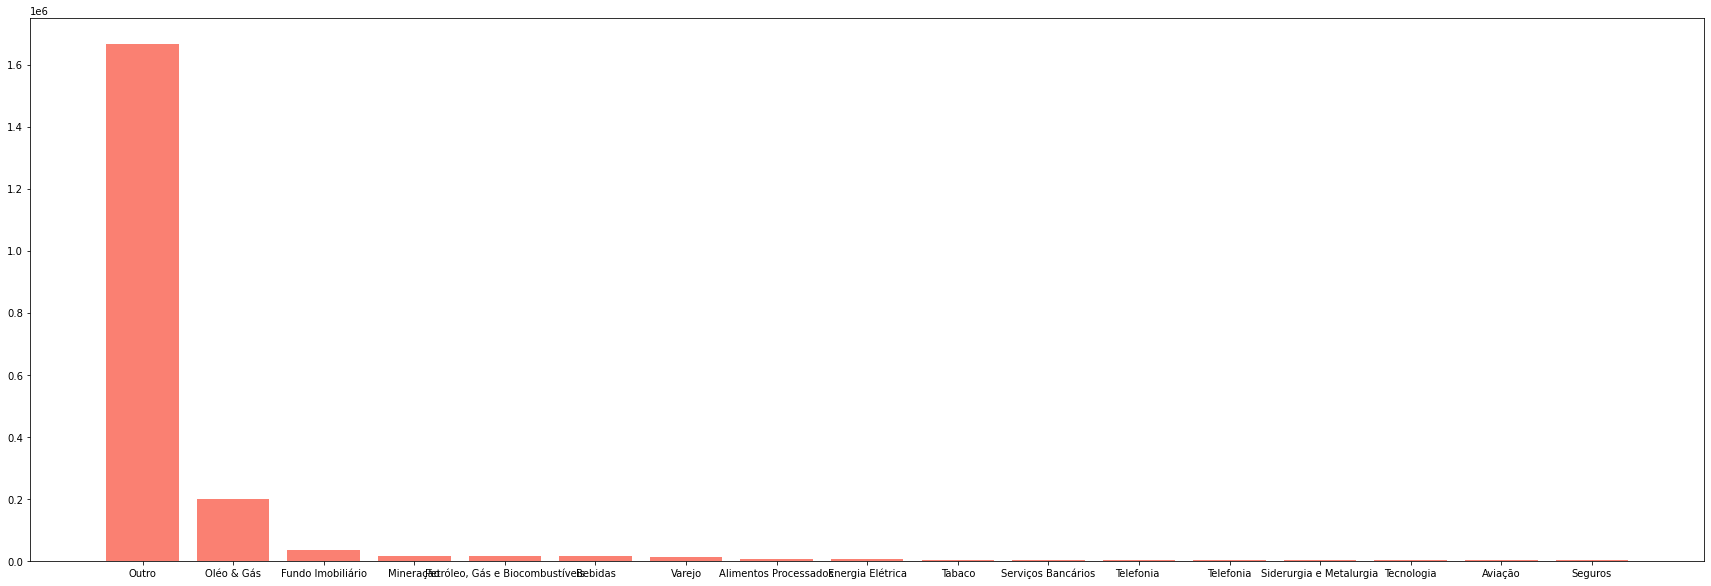

In [13]:
data_2009_largest_fechamento = data_2009.nlargest(50, '12')

segmento = data_2009_largest_fechamento['Segmento']
dezembro = data_2009_largest_fechamento['12']

fig = plt.figure(figsize =(30, 10))
plt.bar(segmento, dezembro, facecolor = 'salmon')
plt.show()

## Menores valores de fechamento dos segmentos em 2009

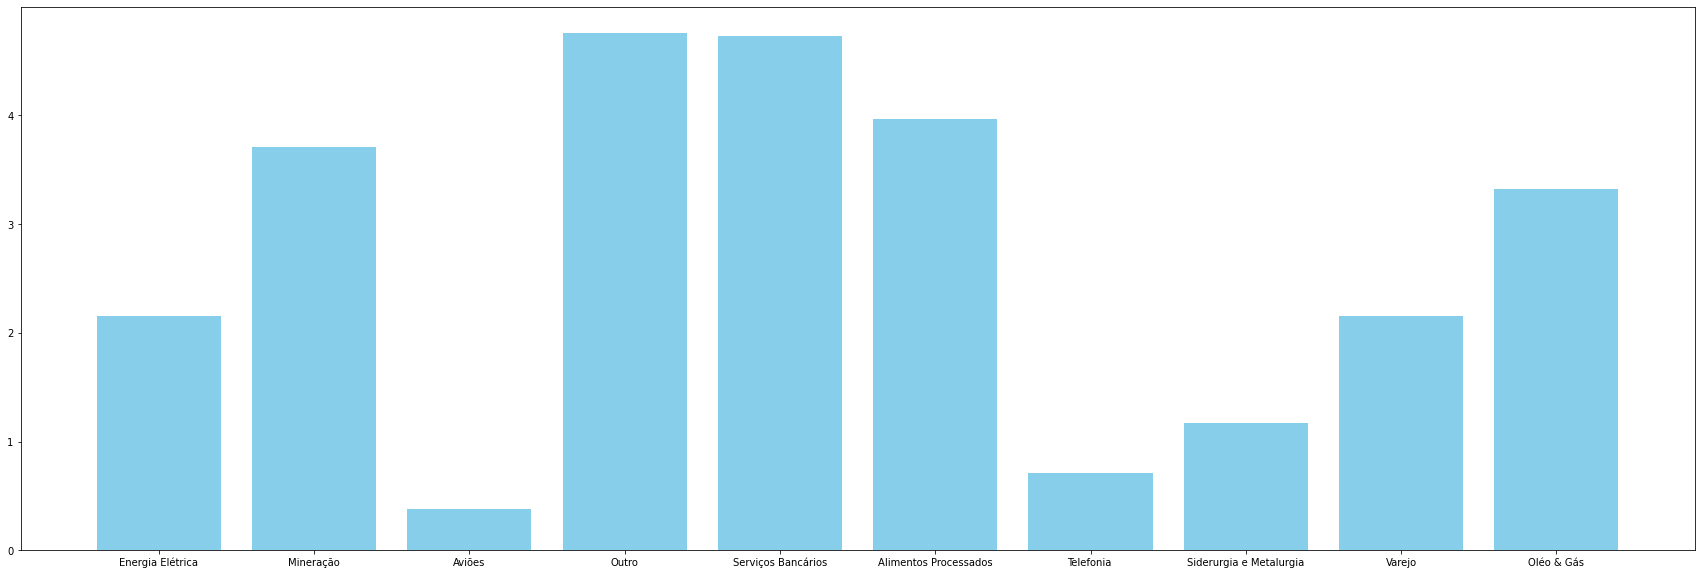

In [14]:
data_2009_lowest_fechamento = data_2009.nsmallest(50, '12')

segmento = data_2009_lowest_fechamento['Segmento']
dezembro = data_2009_lowest_fechamento['12']

fig = plt.figure(figsize =(30, 10))
plt.bar(segmento, dezembro, facecolor = 'skyblue')
plt.show()

## Calculando volatilidade e adicionando a coluna 

In [15]:
data_2009['Volatilidade'] = data_2009['12'] - data_2009['1'] 
data_2009.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
0,Agricultura,M.DIASBRANC,716.76,527.99,626.80,648.13,1004.90,1016.75,1289.17,1333.14,1314.88,1409.28,1260.86,1750.96,1034.20
1,Agricultura,SAO MARTINH,459.42,427.82,497.24,506.13,659.76,734.02,832.45,912.14,862.22,960.29,774.42,1346.66,887.24
2,Agricultura,SLC AGRICOL,596.13,456.43,591.26,603.37,637.70,890.44,919.39,1102.16,960.12,1266.20,824.58,828.96,232.83
3,Alimentos Processados,BRF FOODS,NaN,NaN,NaN,NaN,NaN,NaN,2921.90,4014.35,3612.52,4712.98,6512.78,6198.30,NaN
4,Alimentos Processados,BRFS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.61,NaN


## Analisando qual empresa mais desvalorizou em 2009

In [16]:
data_2009_lowest = data_2009.nsmallest(20, 'Volatilidade')
data_2009_lowest.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
131,Fundo Imobiliário,FII TORRE A,22876.57,23057.53,26705.18,27657.39,29571.64,26934.38,30987.34,29349.52,28340.53,11186.01,25773.12,18145.66,-4730.91
382,Outro,INVEST TUR,6676.99,3880.44,1843.89,4479.93,2091.00,2522.00,2089.80,3148.51,2380.98,5676.28,2845.27,3571.94,-3105.05
111,Fundo Imobiliário,FII CRIANCA,1648.00,416.00,705.01,723.03,471.62,NaN,502.02,778.01,1100.00,1904.99,1695.02,284.00,-1364.00
659,Serviços Bancários,NOSSA CAIXA,3720.48,2755.93,3436.56,3136.19,3180.78,3287.13,3623.32,3456.72,3329.20,2653.03,2512.72,2407.03,-1313.45
99,Energia Elétrica,MPX ENERGIA,4218.46,4217.87,5768.73,6476.47,13383.11,15030.18,13915.42,1484.88,1847.59,2645.81,2558.61,2947.30,-1271.16


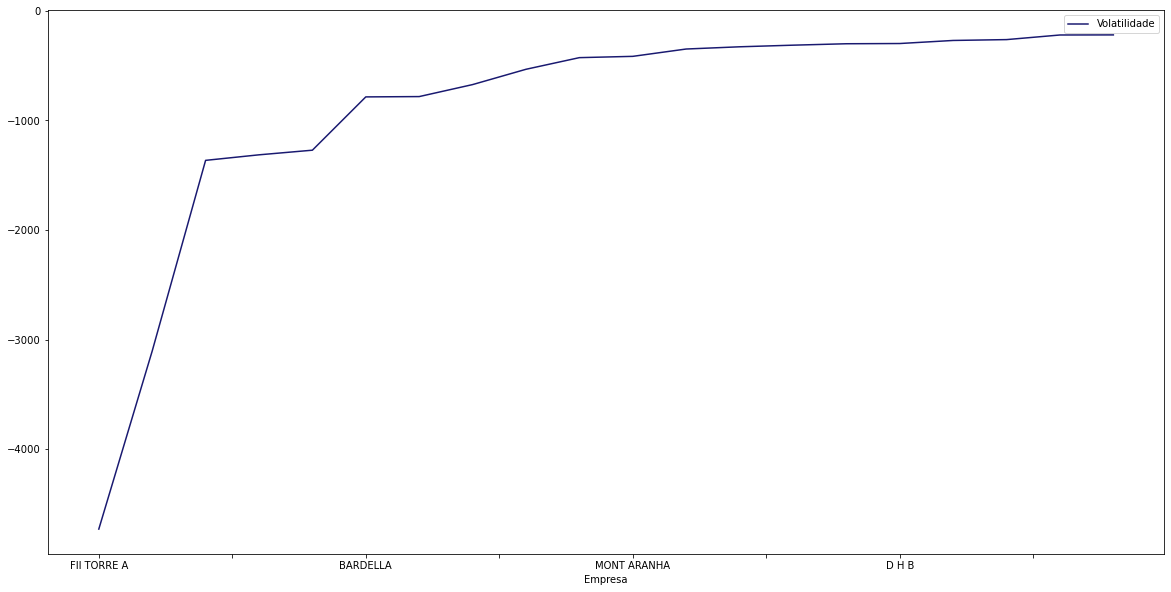

In [17]:
data_2009_lowest.plot(x='Empresa', y='Volatilidade', figsize=(20, 10), color = 'midnightblue') 
plt.savefig('desvalorizou_empresa_2009.png', ddp=300)

## Analisando a variância da FII TORRE A em 2009

In [18]:
data_torre = data_2009_lowest[data_2009_lowest['Empresa'].str.contains('FII TORRE A')]
data_torre = data_torre.nsmallest(1, 'Volatilidade')
data_torre = data_torre.drop(['Segmento', 'Volatilidade'], axis=1)
data_torre.head()

,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
131,FII TORRE A,22876.57,23057.53,26705.18,27657.39,29571.64,26934.38,30987.34,29349.52,28340.53,11186.01,25773.12,18145.66


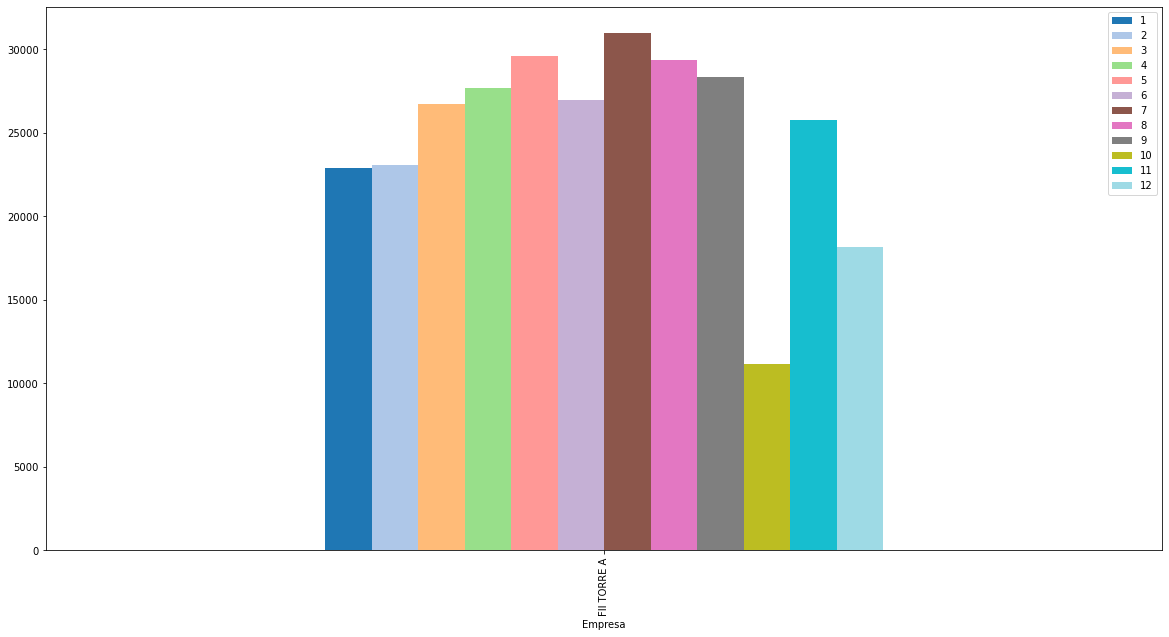

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
data_torre.plot.bar(x='Empresa', ax=ax, colormap = "tab20")
plt.savefig('variancia_empresa_2009.png', ddp=300)

## Analisando qual empresa mais valorizou em 2009

In [20]:
data_2009_largest = data_2009.nlargest(20, 'Volatilidade')
data_2009_largest = data_2009_largest.iloc[1:,]
data_2009_largest.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
167,Oléo & Gás,OGX PETROLE,14910.67,16579.23,23229.46,33330.03,37771.28,47645.20,99965.55,110035.78,130871.28,219146.11,223150.84,199465.53,184554.86
370,Outro,IBOVE,271780.31,621875.53,361460.33,503700.82,208880.23,347891.25,175021.48,149314.21,142996.81,240660.37,271274.46,446763.51,174983.20
160,Mineração,VALE,1836.07,2421.32,1811.99,1158.72,4929.88,15170.31,14111.99,14198.49,14906.83,17737.60,17334.75,18311.23,16475.16
713,Varejo,B2W VAREJO,1625.83,2548.94,1835.47,2060.46,2688.48,3571.98,2835.07,12130.81,5869.78,3968.11,8110.23,14265.92,12640.09
110,Fundo Imobiliário,FII BB PROG,27868.53,26025.76,40742.30,34648.23,34126.57,37360.70,41471.62,41327.01,43764.67,46728.98,37398.94,36545.58,8677.05


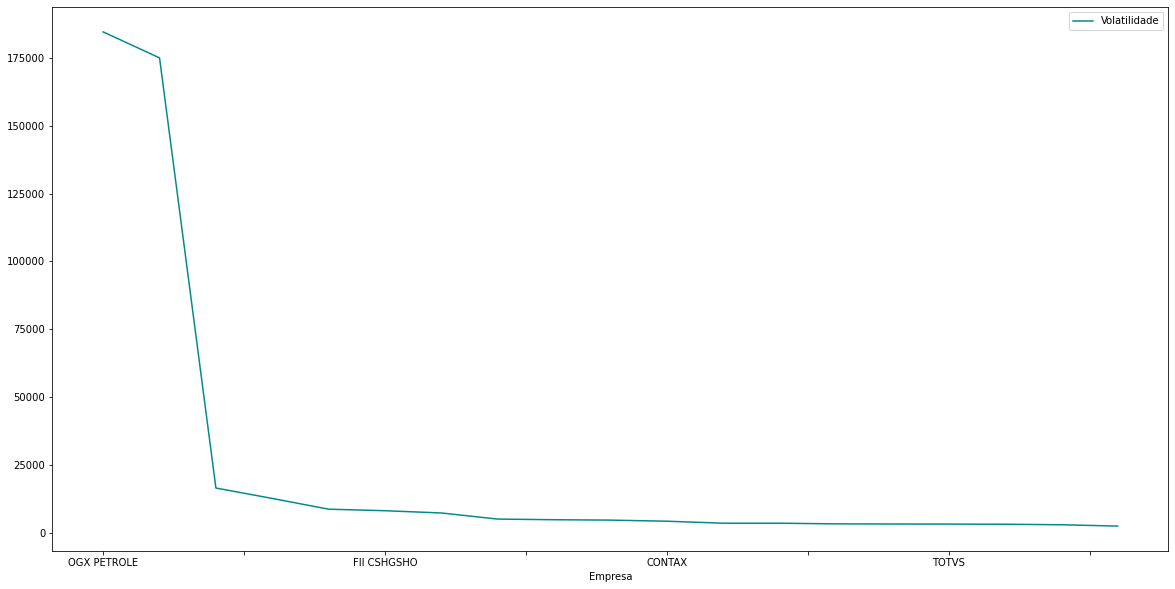

In [21]:
data_2009_largest.plot(x='Empresa', y='Volatilidade', figsize=(20, 10), color = 'darkcyan') 
plt.savefig('valorizou_empresa_2009.png', ddp=300)

## Analisando a variância da OGX PETROLE em 2009

In [22]:
data_ogx = data_2009_largest[data_2009_largest['Empresa'].str.contains("OGX PETROLE")]
data_ogx = data_ogx.nlargest(1, 'Volatilidade')
data_ogx = data_ogx.drop(['Segmento', 'Volatilidade'], axis=1)
data_ogx.head()

,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
167,OGX PETROLE,14910.67,16579.23,23229.46,33330.03,37771.28,47645.2,99965.55,110035.78,130871.28,219146.11,223150.84,199465.53


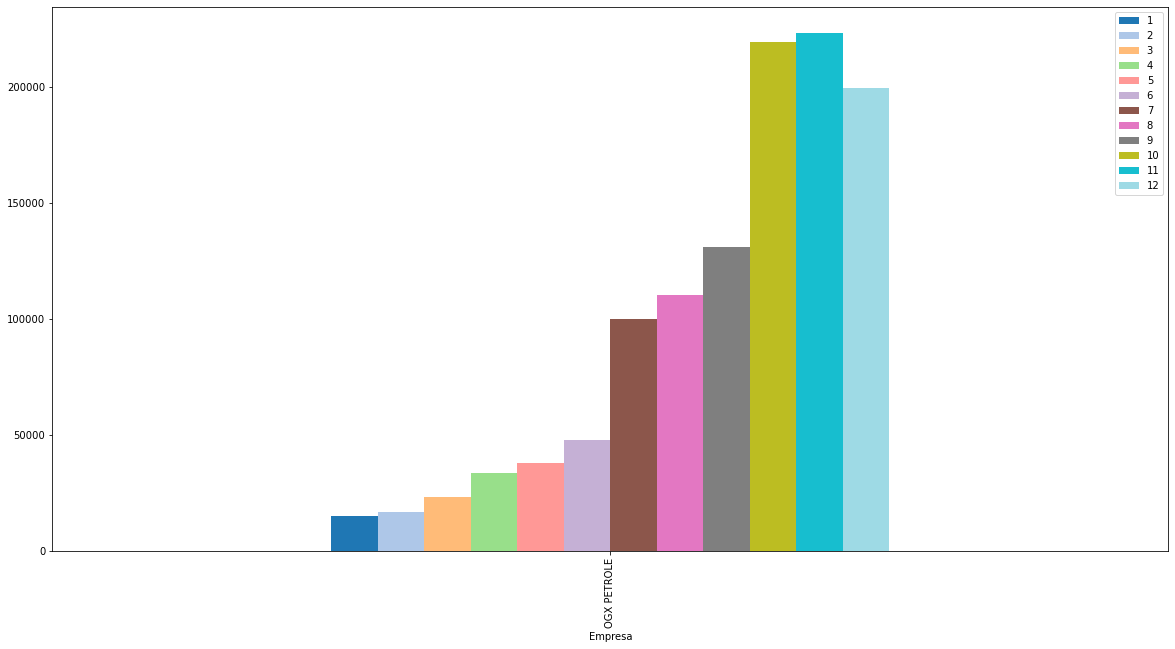

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
data_ogx.plot.bar(x='Empresa', ax=ax, colormap = "tab20")
plt.savefig('variancia_ogx_2009.png', ddp=300)

## Analisando segmentos que mais valorizaram em 2009

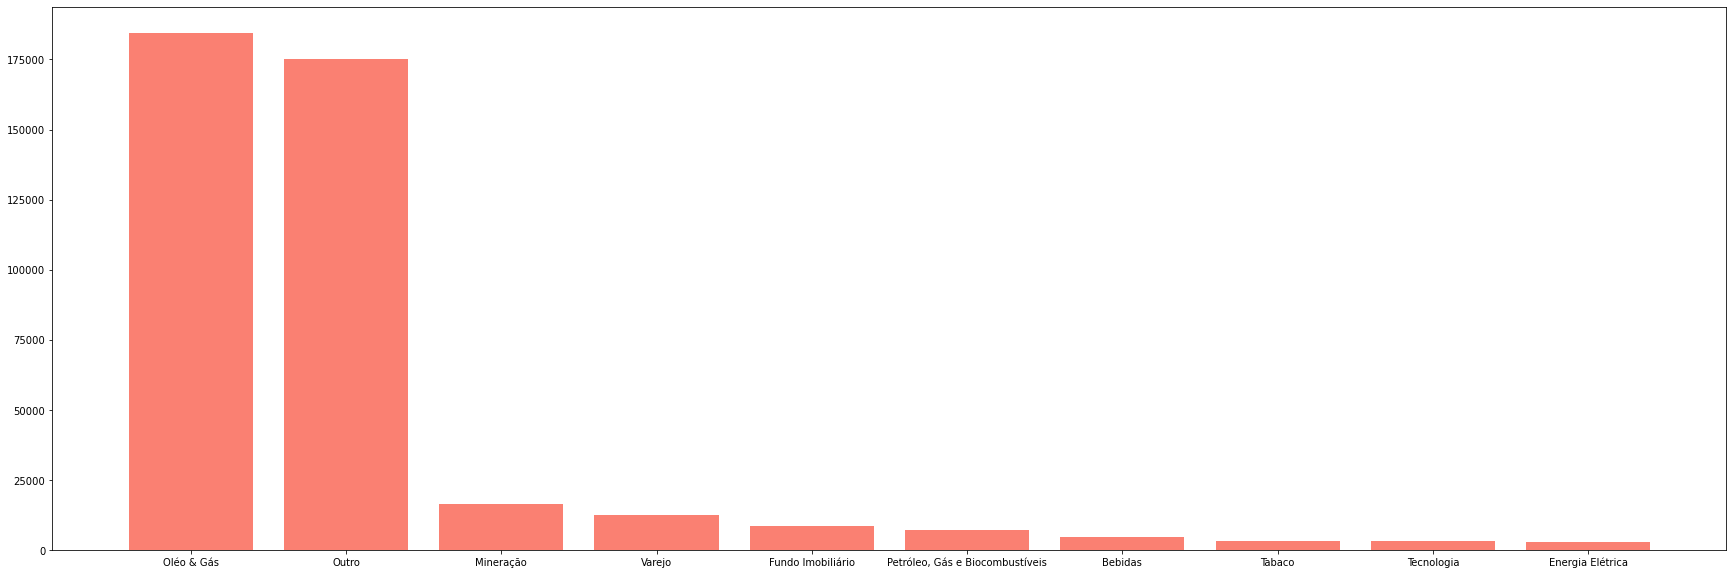

In [24]:
segmento = data_2009_largest['Segmento']
volatilidade = data_2009_largest['Volatilidade']

fig = plt.figure(figsize =(30, 10))
plt.bar(segmento[0:20], volatilidade[0:20],facecolor = 'salmon')
plt.savefig('valorizou_segmento_2009.png', ddp=300)
plt.show()

## Analisando segmentos que mais desvalorizaram em 2009

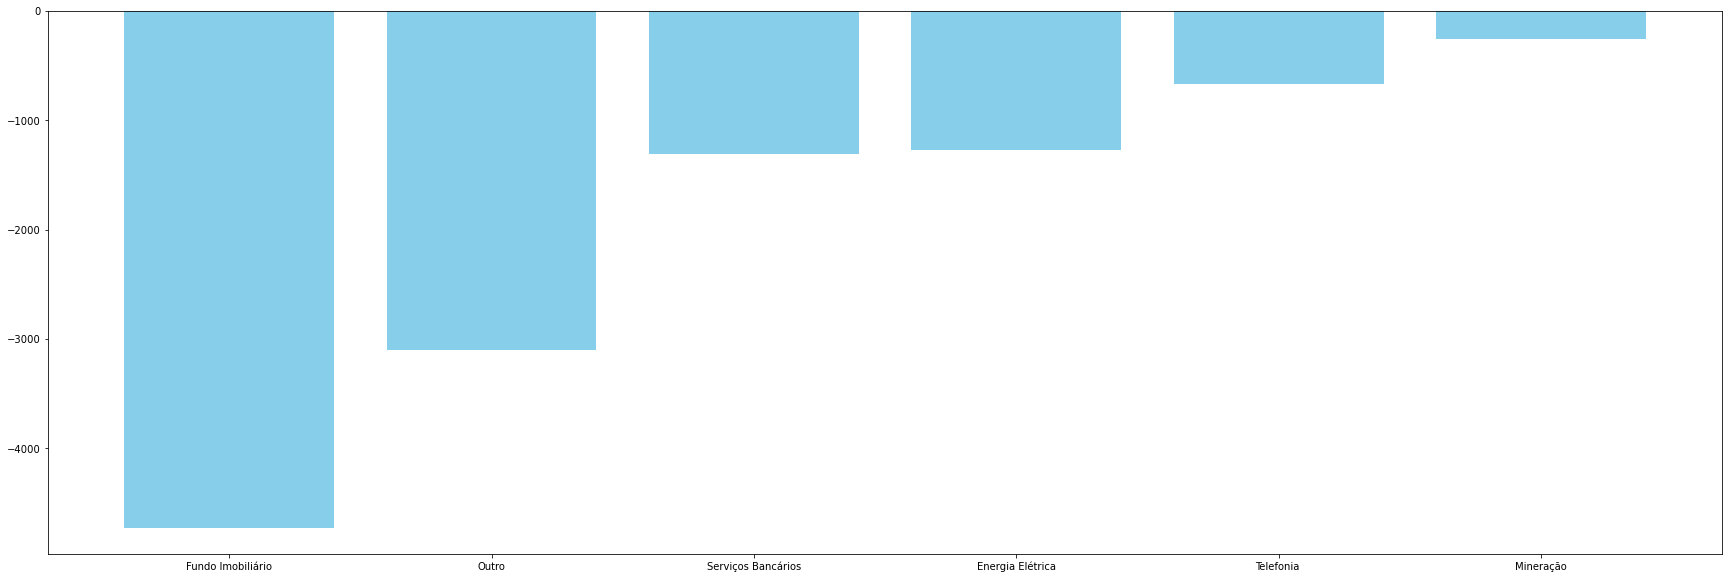

In [25]:
segmento = data_2009_lowest['Segmento']
volatilidade = data_2009_lowest['Volatilidade']

fig = plt.figure(figsize =(30, 10))
plt.bar(segmento[0:20], volatilidade[0:20], facecolor = 'skyblue')
plt.savefig('desvalorizou_segmento_2009.png', ddp=300)
plt.show()

## Correlação 2009

In [26]:
data_2009_cor = data_2009.copy()
data_2009_cor['Segmento'] = data_2009_cor['Segmento'].astype('category').cat.codes
data_2009_cor['Segmento']

0       0
1       0
2       0
3       1
4       1
       ..
716    46
717    46
718    46
719    46
720    46
Name: Segmento, Length: 721, dtype: int8

In [27]:
data_2009_cor['Empresa'] = data_2009_cor['Empresa'].astype('category').cat.codes
data_2009_cor['Empresa']

0      443
1      589
2      603
3      100
4      101
      ... 
716    417
717    418
718    433
719    508
720    520
Name: Empresa, Length: 721, dtype: int16

In [28]:
correlations = data_2009_cor.corr()
data_2009_cor.corr()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
Segmento,1.000000,0.086516,-0.008986,-0.003812,-0.012293,-0.004850,-0.020726,-0.008090,-0.027780,-0.007015,-0.015305,-0.003298,-0.016594,-0.002953,-0.001657
Empresa,0.086516,1.000000,-0.005872,-0.002790,-0.004252,-0.002146,0.007413,-0.000174,0.005280,-0.000884,0.003789,0.003537,0.013428,0.002727,0.001513
1,-0.008986,-0.005872,1.000000,0.973547,0.993633,0.998588,0.973385,0.984891,0.898482,0.910208,0.918665,0.915589,0.871128,0.942537,0.891481
2,-0.003812,-0.002790,0.973547,1.000000,0.991250,0.974543,0.974941,0.923856,0.906741,0.799180,0.867245,0.811286,0.873719,0.851334,0.777741
3,-0.012293,-0.004252,0.993633,0.991250,1.000000,0.992286,0.984807,0.960940,0.919209,0.862156,0.908587,0.871021,0.886938,0.903061,0.840716
4,-0.004850,-0.002146,0.998588,0.974543,0.992286,1.000000,0.968909,0.985857,0.890796,0.912458,0.914022,0.918545,0.870020,0.945989,0.896661
5,-0.020726,0.007413,0.973385,0.974941,0.984807,0.968909,1.000000,0.936178,0.948659,0.834201,0.923731,0.846606,0.913858,0.873852,0.809277
6,-0.008090,-0.000174,0.984891,0.923856,0.960940,0.985857,0.936178,1.000000,0.855876,0.966892,0.923374,0.968653,0.843776,0.985071,0.955256
7,-0.027780,0.005280,0.898482,0.906741,0.919209,0.890796,0.948659,0.855876,1.000000,0.765811,0.956922,0.792689,0.981233,0.802087,0.740461
8,-0.007015,-0.000884,0.910208,0.799180,0.862156,0.912458,0.834201,0.966892,0.765811,1.000000,0.899027,0.997232,0.776596,0.994530,0.997136


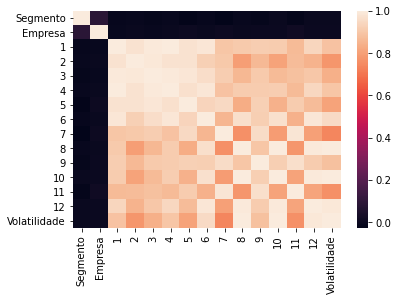

In [29]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlations)
plt.show()

## Classificação 2009

### Naive Bayes Classification Model

In [30]:
data_2009_model = data_2009.copy()
data_2009_model.shape #before removing NaN

(721, 15)

In [31]:
data_2009_model['Improve'] = np.where(data_2009_model['Volatilidade'] >= 0, True, False)
data_2009_model.dropna(inplace=True)
data_2009_model.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade,Improve
0,Agricultura,M.DIASBRANC,716.76,527.99,626.80,648.13,1004.90,1016.75,1289.17,1333.14,1314.88,1409.28,1260.86,1750.96,1034.20,True
1,Agricultura,SAO MARTINH,459.42,427.82,497.24,506.13,659.76,734.02,832.45,912.14,862.22,960.29,774.42,1346.66,887.24,True
2,Agricultura,SLC AGRICOL,596.13,456.43,591.26,603.37,637.70,890.44,919.39,1102.16,960.12,1266.20,824.58,828.96,232.83,True
7,Alimentos Processados,JBS,323.61,244.26,289.22,392.25,576.58,594.88,621.92,616.46,713.94,787.54,1012.20,1068.94,745.33,True
9,Alimentos Processados,MARFRIG,307.99,264.33,312.00,395.21,620.47,747.34,883.54,949.18,1082.45,1211.75,1474.35,1342.43,1034.44,True


In [32]:
data_2009_model.shape #after removing NaN

(354, 16)

In [33]:
X = data_2009_model.iloc[:,0:13].values
X

array([['Agricultura', 'M.DIASBRANC', 716.76, ..., 1314.88, 1409.28,
        1260.86],
       ['Agricultura', 'SAO MARTINH', 459.42, ..., 862.22, 960.29,
        774.42],
       ['Agricultura', 'SLC AGRICOL', 596.13, ..., 960.12, 1266.2,
        824.58],
       ...,
       ['Varejo', 'B2W VAREJO', 1625.83, ..., 5869.78, 3968.11, 8110.23],
       ['Varejo', 'LOJAS AMERI', 722.11, ..., 2006.27, 3155.76, 2558.75],
       ['Varejo', 'P.ACUCAR-CB', 1594.67, ..., 4464.84, 4677.04, 3980.93]],
      dtype=object)

In [34]:
y = data_2009_model.loc[:,'Improve'].values
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [35]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
#creating labelEncoder
le = LabelEncoder()
# Converting string labels into numbers.
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [36]:
X[:,0] = le.fit_transform(X[:,0])
X

array([[0, 'M.DIASBRANC', 716.76, ..., 1314.88, 1409.28, 1260.86],
       [0, 'SAO MARTINH', 459.42, ..., 862.22, 960.29, 774.42],
       [0, 'SLC AGRICOL', 596.13, ..., 960.12, 1266.2, 824.58],
       ...,
       [45, 'B2W VAREJO', 1625.83, ..., 5869.78, 3968.11, 8110.23],
       [45, 'LOJAS AMERI', 722.11, ..., 2006.27, 3155.76, 2558.75],
       [45, 'P.ACUCAR-CB', 1594.67, ..., 4464.84, 4677.04, 3980.93]],
      dtype=object)

In [37]:
X[:,1] = le.fit_transform(X[:,1])
X

array([[0, 214, 716.76, ..., 1314.88, 1409.28, 1260.86],
       [0, 287, 459.42, ..., 862.22, 960.29, 774.42],
       [0, 296, 596.13, ..., 960.12, 1266.2, 824.58],
       ...,
       [45, 22, 1625.83, ..., 5869.78, 3968.11, 8110.23],
       [45, 209, 722.11, ..., 2006.27, 3155.76, 2558.75],
       [45, 247, 1594.67, ..., 4464.84, 4677.04, 3980.93]], dtype=object)

### Let's go to split the dataset into Training and Test set with 70:30 ratio

In [38]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # 70% training and 30% test

In [39]:
#Feature scaling to the training and test set of independent variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()
# or scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
#Train the model using the training sets
model.fit(X_train, y_train)
GaussianNB(priors = None)
#Predict the response for test dataset
y_pred = model.predict(X_test) # y_pred holds the predicted label of our test set.

### Let's see the accuracy of our estimator.

In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.794392523364486


In [42]:
y_pred_train = model.predict(X_train)

y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8502


In [43]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.8502
Test set score: 0.7944


In [44]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 2 16]
 [ 6 83]]

True Positives(TP) =  2

True Negatives(TN) =  83

False Positives(FP) =  16

False Negatives(FN) =  6


### 83 + 2 = 85 correct predictions
### 6 + 16 = 22 incorrect predictions

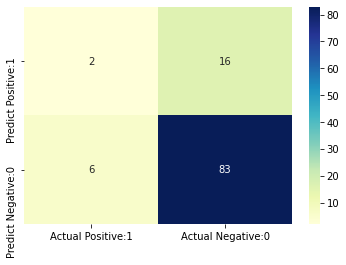

In [45]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('confusion_map_2009.png', ddp=300)

# Pandemia 2020

## Lendo arquivos cotação 2020

In [46]:
data_url_1 = '2020_1_Cotação.csv'
data_2020_1 = pd.read_csv(data_url_1, header='infer', error_bad_lines=False, sep=';')

data_2020_1['Abertura'] = data_2020_1['Abertura'].str.replace(',','.')
data_2020_1['Abertura'] = data_2020_1['Abertura'].astype(float)

data_2020_1.head()

,Empresa,Mês,Abertura,Segmento
0,3M,1,4615.67,BDR
1,3M,10,4920.62,BDR
2,3M,11,4636.61,BDR
3,3M,12,4481.61,BDR
4,3M,2,3621.99,BDR


In [47]:
data_2020_1 = data_2020_1.pivot_table(index=['Segmento', 'Empresa'], columns='Mês', values='Abertura')


print("Total de Linhas: ",data_2020_1.shape[0])


data_2020_1.head()

Total de Linhas:  2078


Mês                             1        2        3        4        5   \
Segmento     Empresa                                                     
Agropecuária POMIFRUTAS     461.82   178.94   132.53   213.34   181.22   
             SLC AGRICOLA  2771.00  1962.87  1479.26  1609.84  1873.52   
             SLCE            23.00      NaN     1.24     0.47      NaN   
             SLCE    /ED       NaN      NaN      NaN      NaN    23.61   
             SLCEE            1.40      NaN    10.70     0.70      NaN   

Mês                             6        7        8        9        10  \
Segmento     Empresa                                                     
Agropecuária POMIFRUTAS     212.72   227.68   192.35   193.88   187.18   
             SLC AGRICOLA  2336.17  2497.16  2014.70  1529.36  1929.30   
             SLCE            20.61     5.00     1.50    47.59     0.45   
             SLCE    /ED       NaN      NaN      NaN      NaN      NaN   
             SLCEE             NaN      NaN      NaN      NaN      NaN   

Mês                             11       12  
Segmento     Empresa                         
Agropecuária POMIFRUTAS     200.11   237.63  
             SLC AGRICOLA  1040.19  1080.84  
             SLCE              NaN      NaN  
             SLCE    /ED       NaN      NaN  
             SLCEE             NaN      NaN

In [48]:
data_url_2 = '2020_2_Cotação.csv'

data_2020_2 = pd.read_csv(data_url_2, header='infer', error_bad_lines=False, sep=';')

data_2020_2['Abertura'] = data_2020_2['Abertura'].str.replace(',','.')
data_2020_2['Abertura'] = data_2020_2['Abertura'].astype(float)

data_2020_2.head()

,Empresa,Abertura,Mês,Segmento
0,3M,4920.62,10,BDR
1,3M,4636.61,11,BDR
2,3M,4481.61,12,BDR
3,3R PETROLEUM,607.62,11,"Petróleo, Gás e Biocombustíveis"
4,3R PETROLEUM,1920.29,12,"Petróleo, Gás e Biocombustíveis"


In [49]:
data_2020_2 = data_2020_2.pivot_table(index=['Segmento', 'Empresa'], columns='Mês', values='Abertura')


print("Total de Linhas: ",data_2020_2.shape[0])


data_2020_2.head()

Total de Linhas:  1854


Mês                    10     11    12
Segmento Empresa                      
#N/D     ALSO         NaN   1.92  0.50
         AMAR         NaN    NaN  0.51
         ARZZ    /EDJ NaN   3.00   NaN
         ARZZE    /ED NaN   1.05   NaN
         BEEF    /ED  NaN  14.73   NaN

In [50]:
data_2020 = pd.concat([data_2020_1,data_2020_2])

print("Total de Linhas: ",data_2020.shape[0])

data_2020.head()

Total de Linhas:  3932


Mês                             1        2        3        4        5   \
Segmento     Empresa                                                     
Agropecuária POMIFRUTAS     461.82   178.94   132.53   213.34   181.22   
             SLC AGRICOLA  2771.00  1962.87  1479.26  1609.84  1873.52   
             SLCE            23.00      NaN     1.24     0.47      NaN   
             SLCE    /ED       NaN      NaN      NaN      NaN    23.61   
             SLCEE            1.40      NaN    10.70     0.70      NaN   

Mês                             6        7        8        9        10  \
Segmento     Empresa                                                     
Agropecuária POMIFRUTAS     212.72   227.68   192.35   193.88   187.18   
             SLC AGRICOLA  2336.17  2497.16  2014.70  1529.36  1929.30   
             SLCE            20.61     5.00     1.50    47.59     0.45   
             SLCE    /ED       NaN      NaN      NaN      NaN      NaN   
             SLCEE             NaN      NaN      NaN      NaN      NaN   

Mês                             11       12  
Segmento     Empresa                         
Agropecuária POMIFRUTAS     200.11   237.63  
             SLC AGRICOLA  1040.19  1080.84  
             SLCE              NaN      NaN  
             SLCE    /ED       NaN      NaN  
             SLCEE             NaN      NaN

## Tratando e convertendo os dados de valores

## Fazendo transposição

In [51]:
data_2020.to_csv('2020.csv')

## Visualizando nova tabela transposta

In [52]:
data_url = '2020.csv'
data_2020 = pd.read_csv(data_url, header='infer', error_bad_lines=False, sep=',',)
print("Total de Linhas: ",data_2020.shape[0])
data_2020.head()

Total de Linhas:  3932


,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
0,Agropecuária,POMIFRUTAS,461.82,178.94,132.53,213.34,181.22,212.72,227.68,192.35,193.88,187.18,200.11,237.63
1,Agropecuária,SLC AGRICOLA,2771.00,1962.87,1479.26,1609.84,1873.52,2336.17,2497.16,2014.70,1529.36,1929.30,1040.19,1080.84
2,Agropecuária,SLCE,23.00,NaN,1.24,0.47,NaN,20.61,5.00,1.50,47.59,0.45,NaN,NaN
3,Agropecuária,SLCE /ED,NaN,NaN,NaN,NaN,23.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agropecuária,SLCEE,1.40,NaN,10.70,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Maiores valores de abertura das empresas em 2020

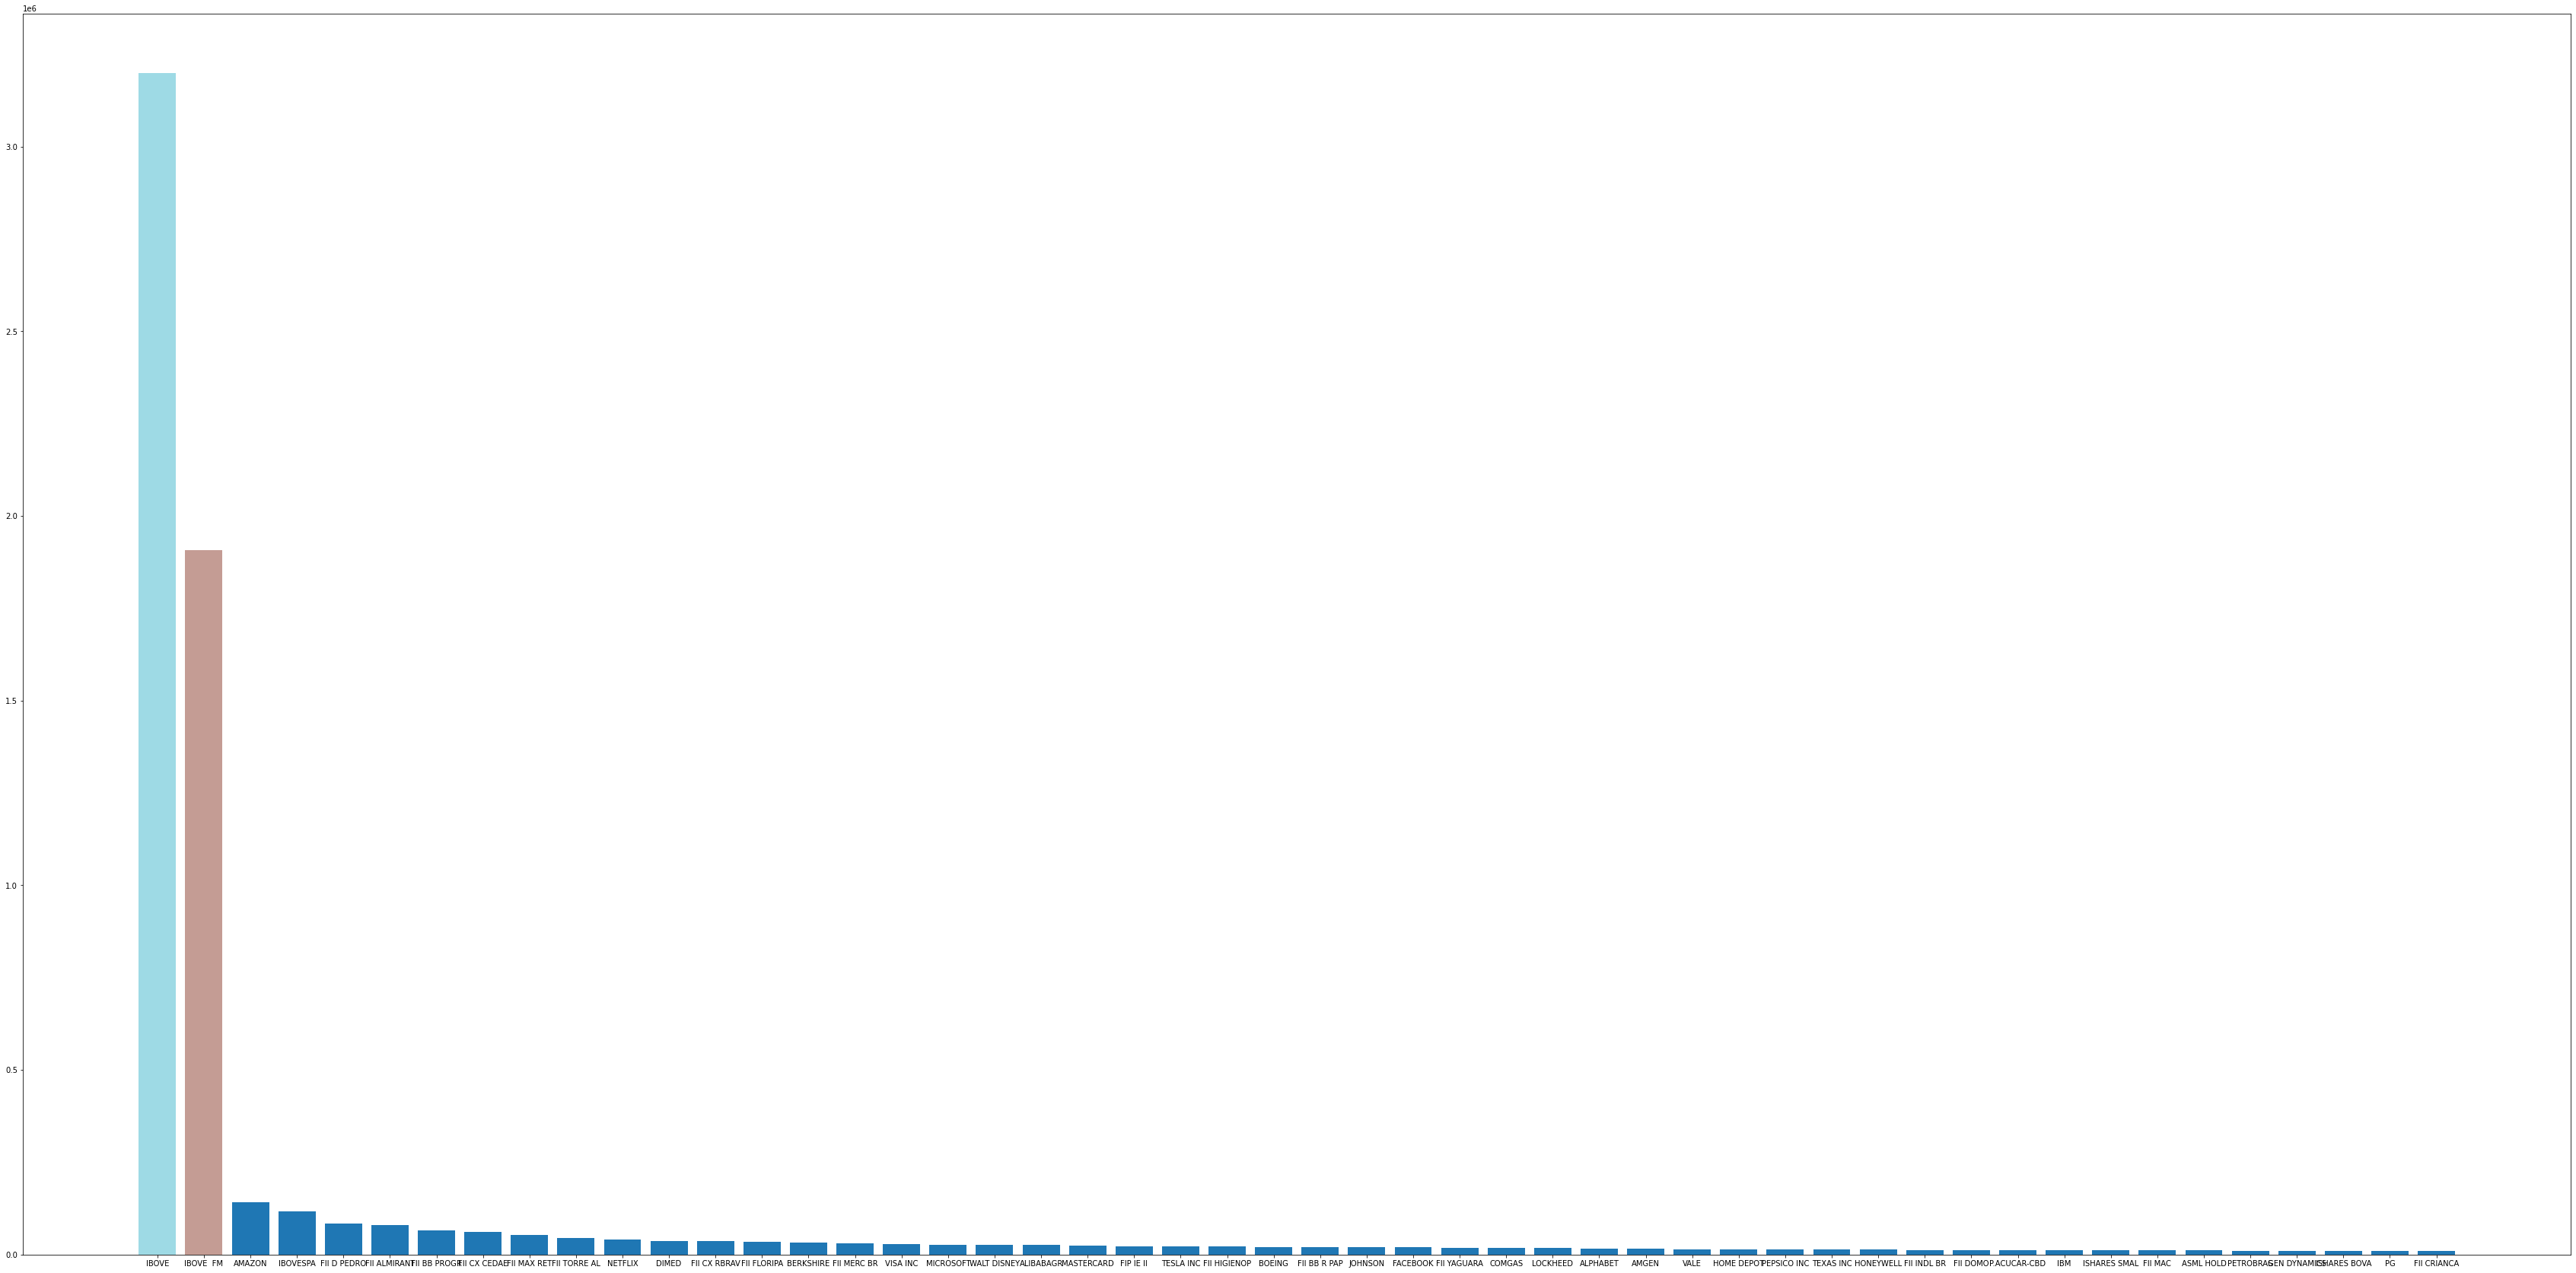

In [53]:
data_2020_largest_abertura = data_2020.nlargest(50, '1')

empresa = data_2020_largest_abertura['Empresa']
janeiro = data_2020_largest_abertura['1']

fmy_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, janeiro, color=my_cmap(rescale(janeiro)))
plt.show()

## Menores valores de abertura das empresas em 2020

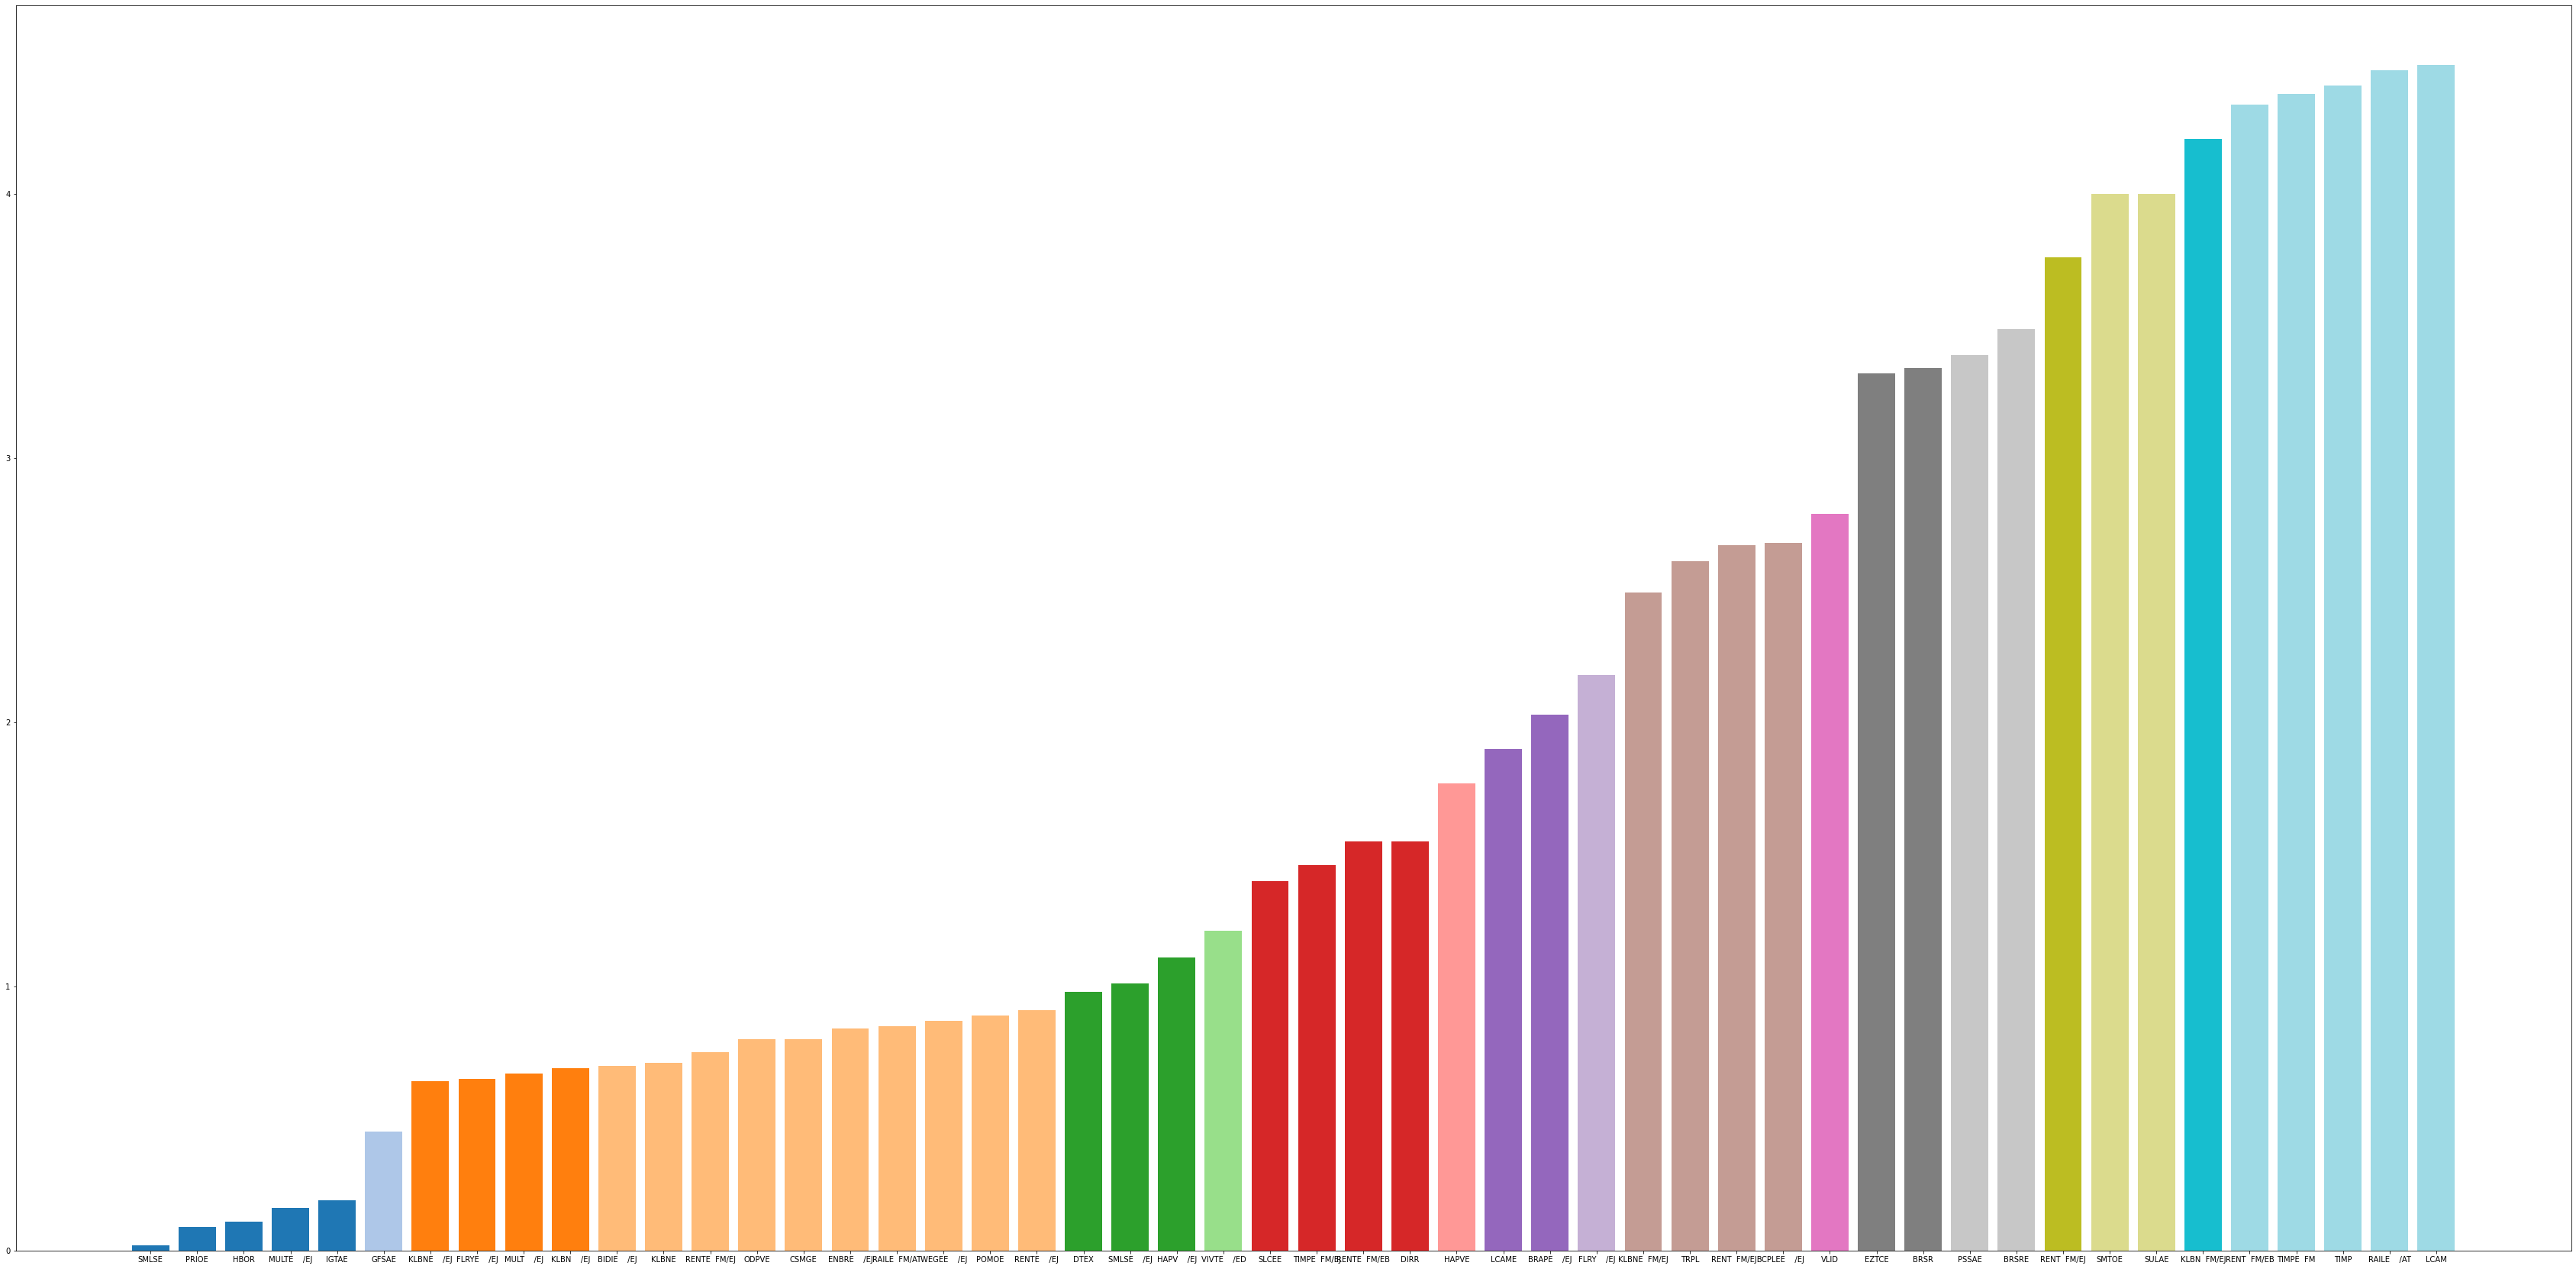

In [54]:
data_2020_lowest_abertura = data_2020.nsmallest(50, '1')

empresa = data_2020_lowest_abertura['Empresa']
janeiro = data_2020_lowest_abertura['1']

fmy_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, janeiro, color=my_cmap(rescale(janeiro)))
plt.show()

## Menores valores de abertura dos segmentos em 2020

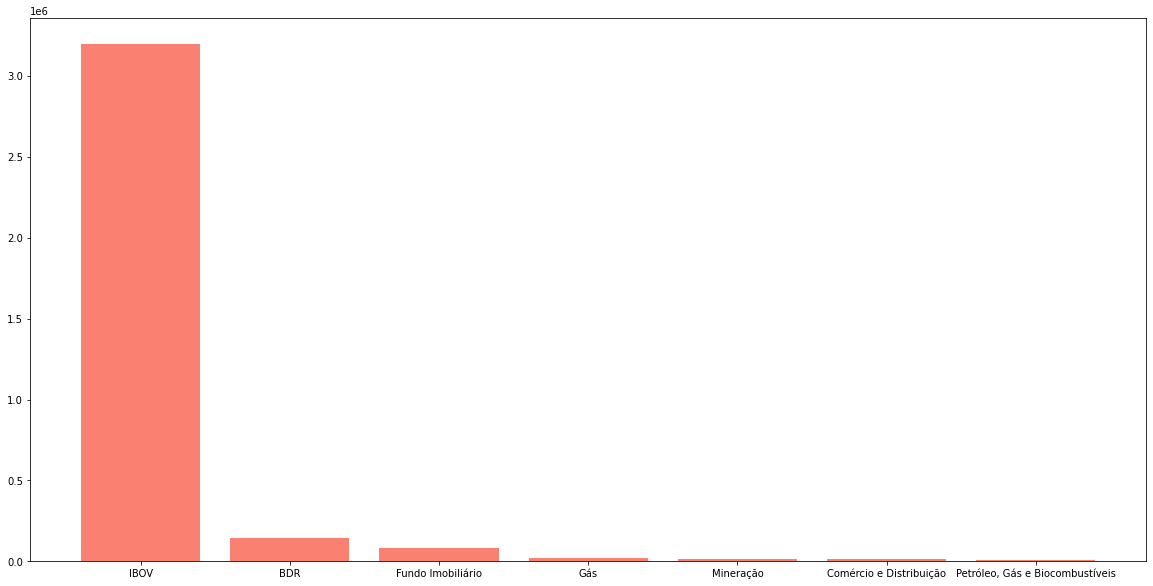

In [55]:
data_2020_largest_abertura = data_2020.nlargest(50, '1')

empresa = data_2020_largest_abertura['Segmento']
janeiro = data_2020_largest_abertura['1']

fig = plt.figure(figsize =(20, 10))
plt.bar(empresa, janeiro, facecolor = 'salmon')
plt.show()

## Maiores valores de abertura dos segmentos em 2020

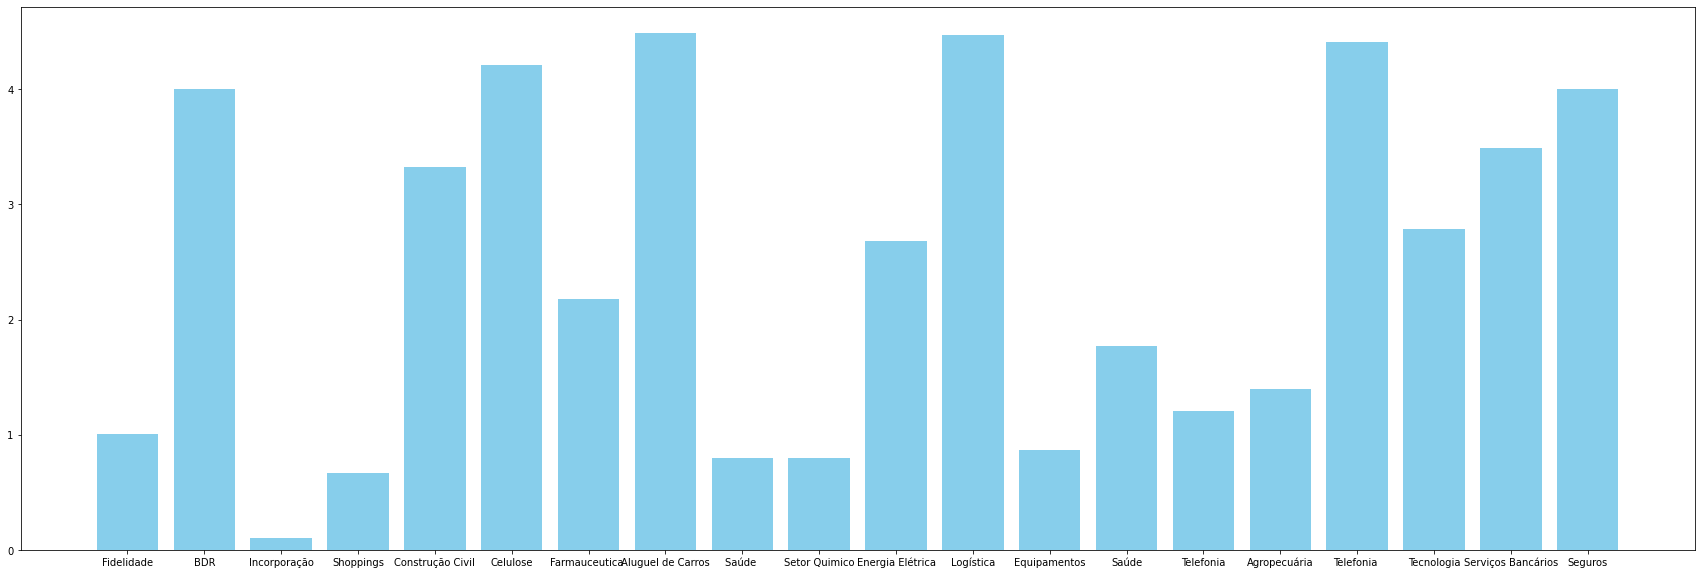

In [56]:
data_2020_lowest_abertura = data_2020.nsmallest(50, '1')

empresa = data_2020_lowest_abertura['Segmento']
janeiro = data_2020_lowest_abertura['1']

fig = plt.figure(figsize =(30, 10))
plt.bar(empresa, janeiro, facecolor = 'skyblue')
plt.show()

## Maiores valores de fechamento das empresas em 2020

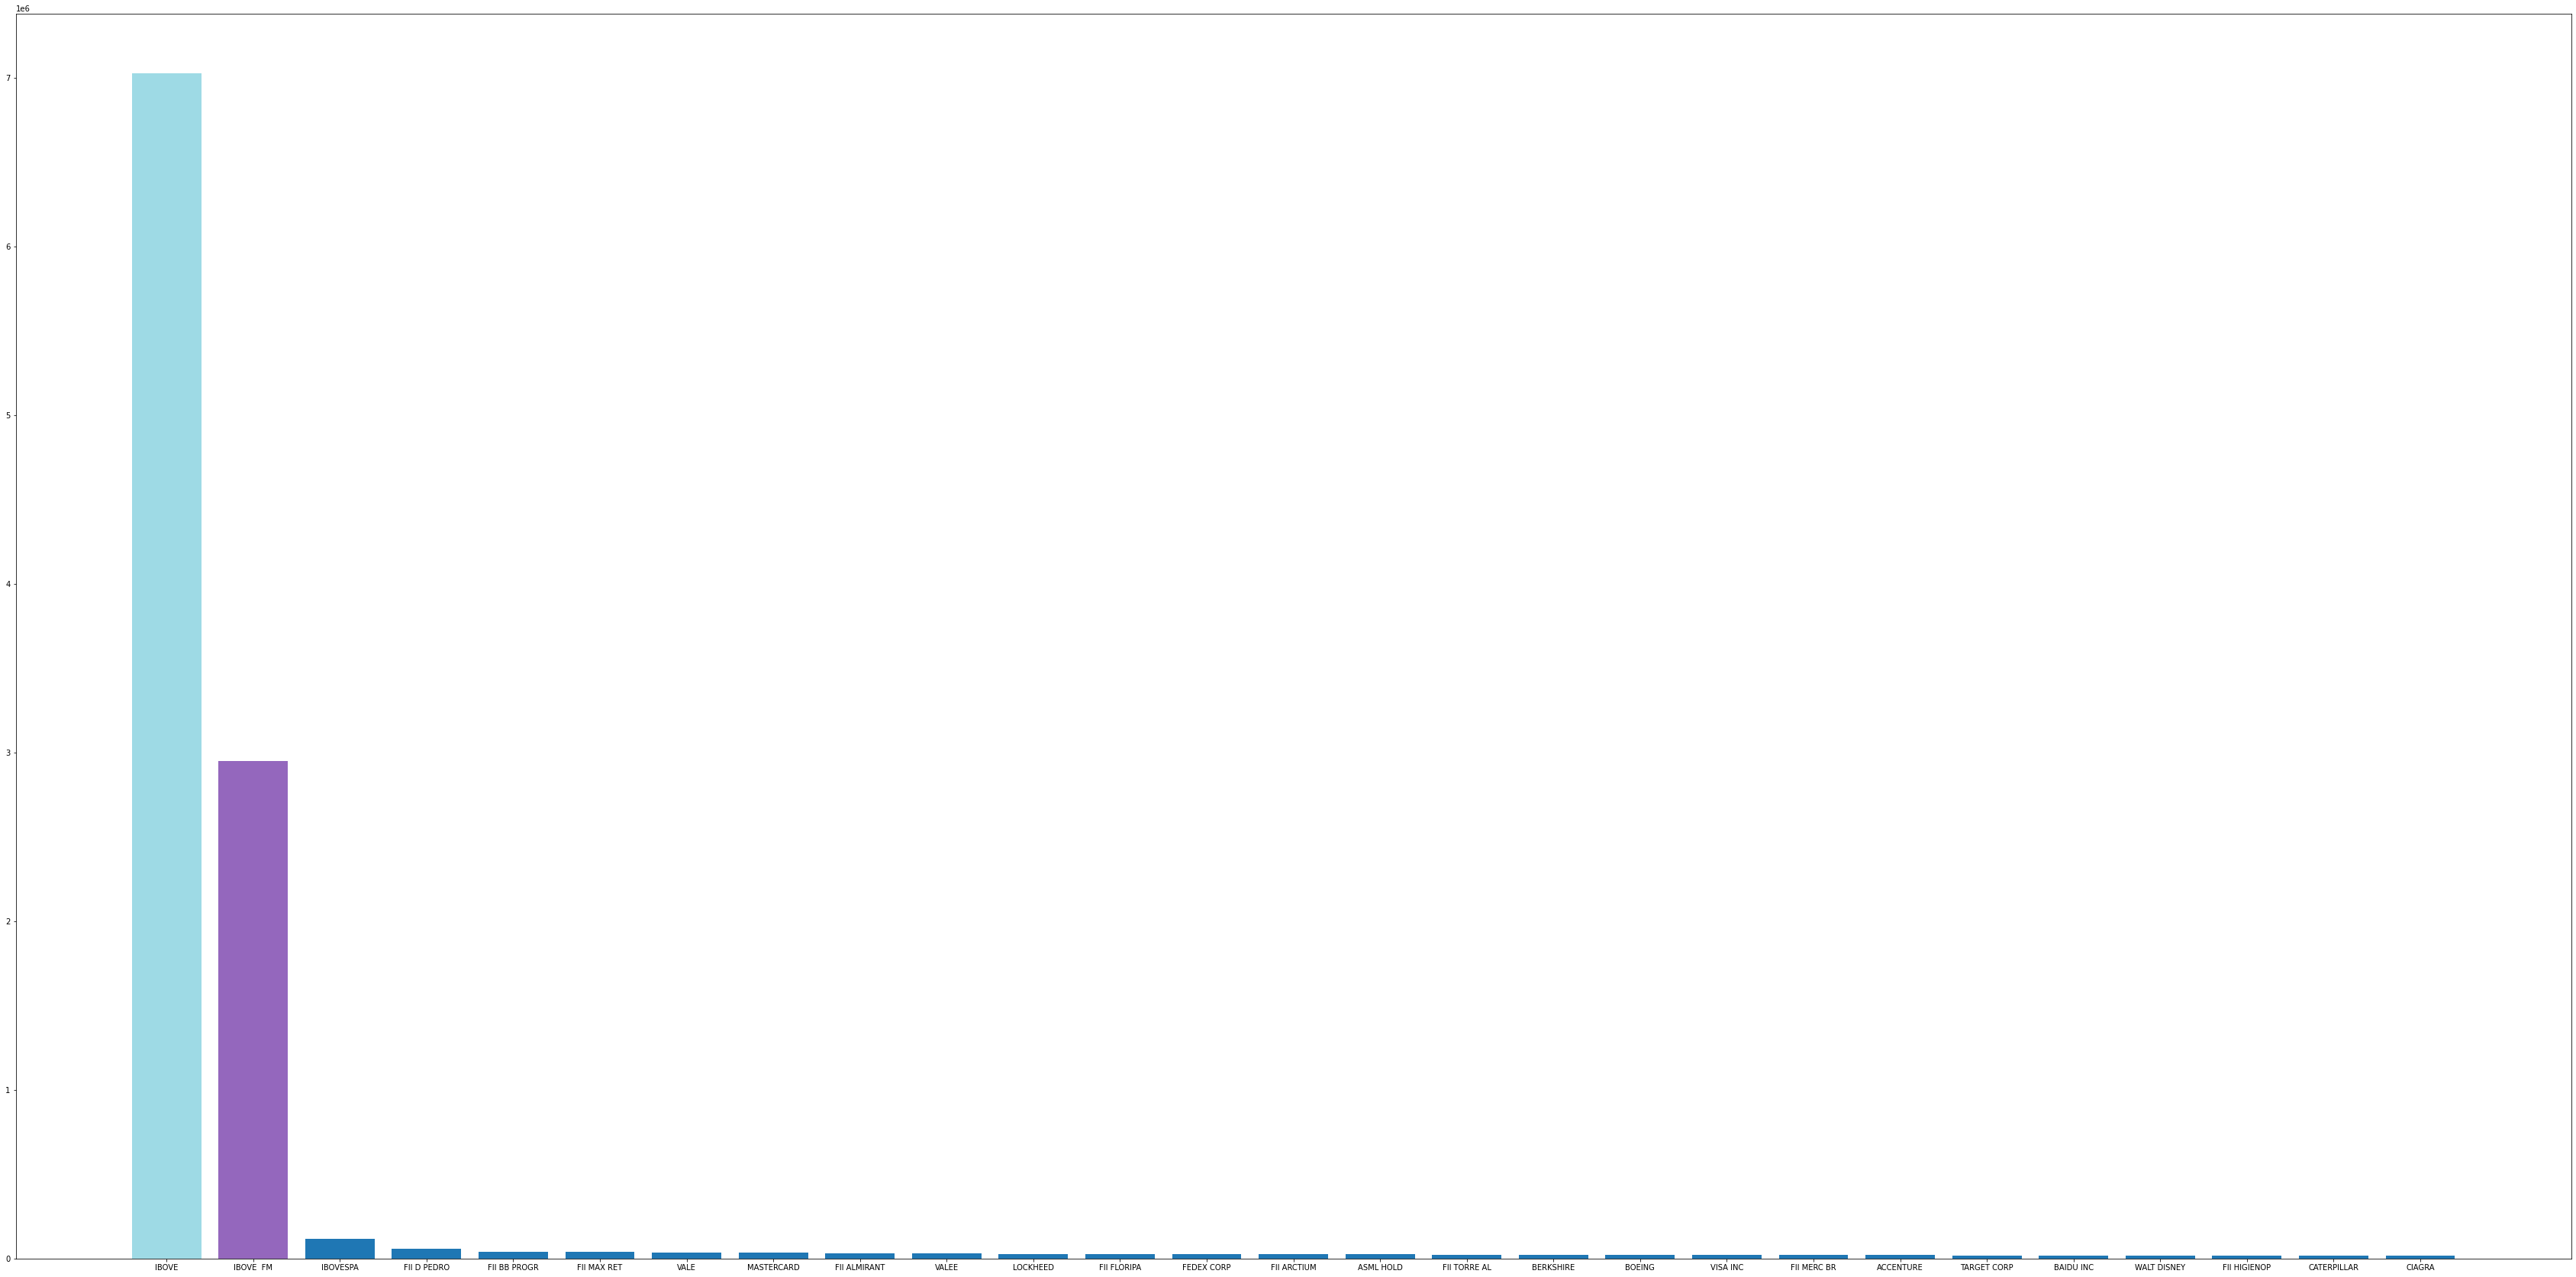

In [57]:
data_2020_largest_fechamento = data_2020.nlargest(50, '12')

empresa = data_2020_largest_fechamento['Empresa']
dezembro = data_2020_largest_fechamento['12']

fmy_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, dezembro, color=my_cmap(rescale(dezembro)))
plt.show()

## Menores valores de fechamento das empresas em 2020

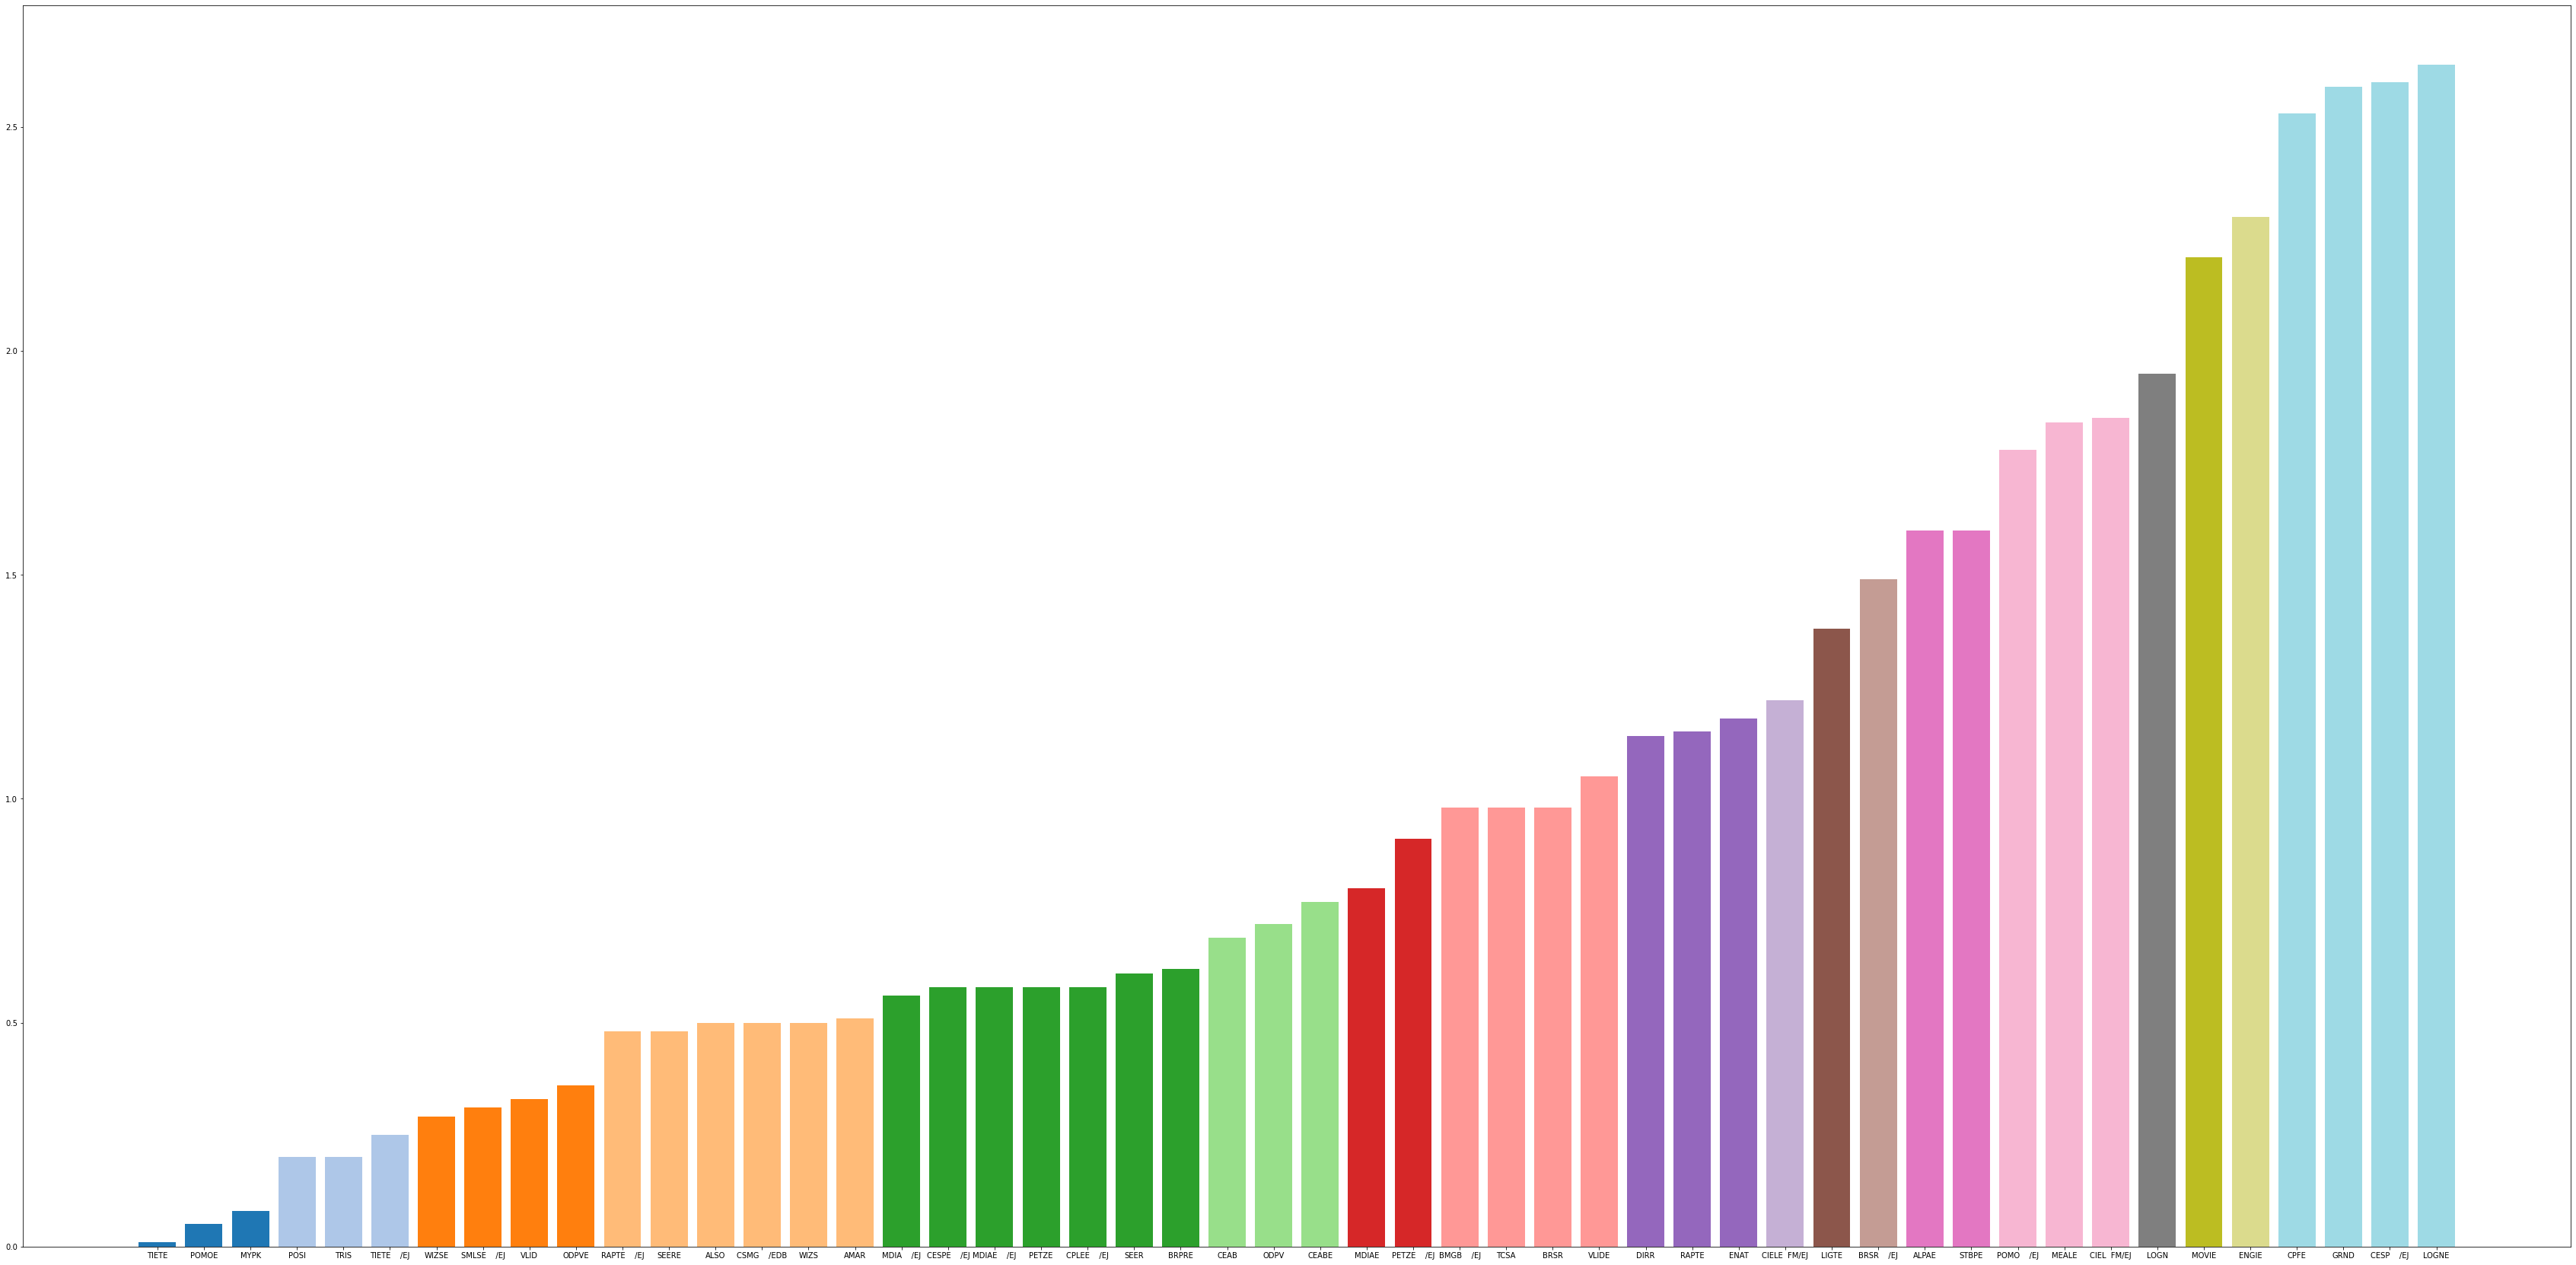

In [58]:
data_2020_lowest_fechamento = data_2020.nsmallest(50, '12')

empresa = data_2020_lowest_fechamento['Empresa']
dezembro = data_2020_lowest_fechamento['12']

fmy_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, dezembro, color=my_cmap(rescale(dezembro)))
plt.show()

## Maiores valores de fechamento dos segmentos em 2020

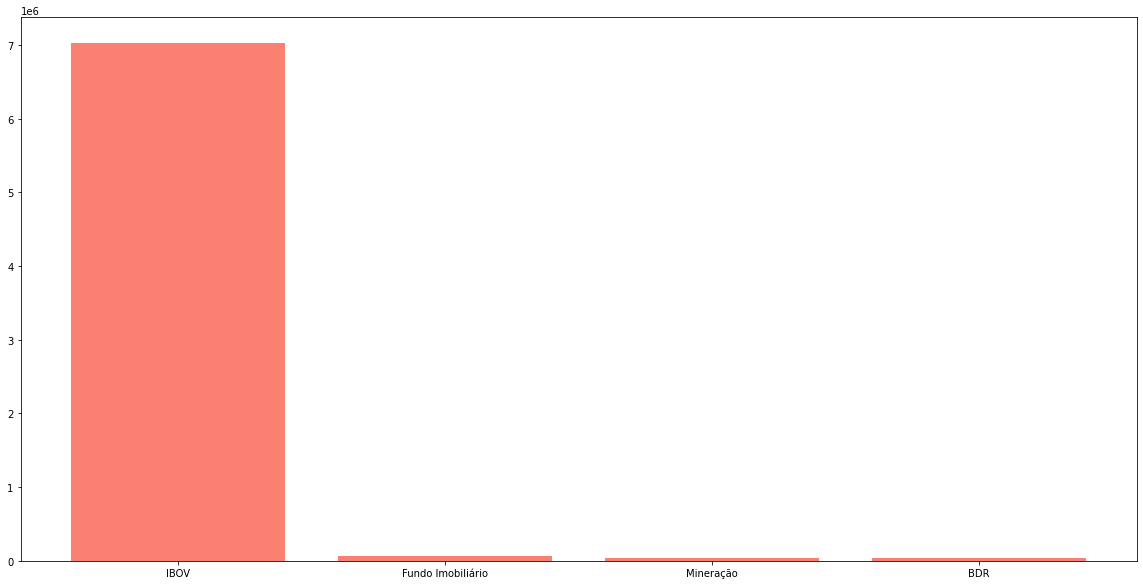

In [59]:
data_2020_largest_fechamento = data_2020.nlargest(50, '12')

segmento = data_2020_largest_fechamento['Segmento']
dezembro = data_2020_largest_fechamento['12']

fig = plt.figure(figsize =(20, 10))
plt.bar(segmento, dezembro, facecolor = 'salmon')
plt.show()

## Menores valores de fechamento dos segmentos em 2020

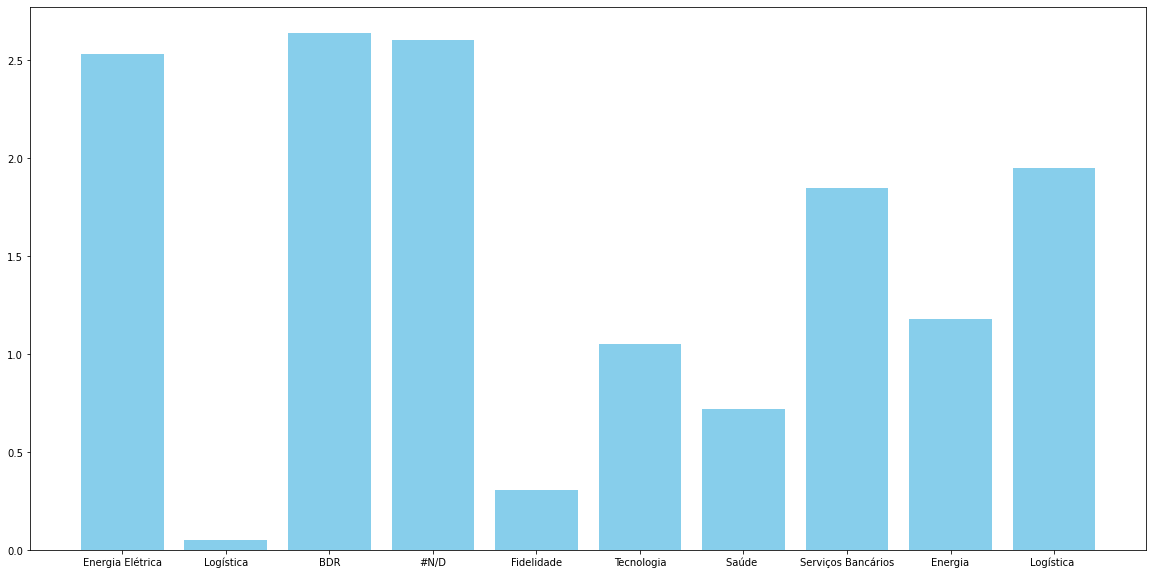

In [60]:
data_2020_lowest_fechamento = data_2020.nsmallest(50, '12')

segmento = data_2020_lowest_fechamento['Segmento']
dezembro = data_2020_lowest_fechamento['12']

fig = plt.figure(figsize =(20, 10))
plt.bar(segmento, dezembro, facecolor = 'skyblue')
plt.show()

## Calculando volatilidade e adicionando a coluna 

In [61]:
data_2020['Volatilidade'] = data_2020['12'] - data_2020['1'] 
data_2020.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
0,Agropecuária,POMIFRUTAS,461.82,178.94,132.53,213.34,181.22,212.72,227.68,192.35,193.88,187.18,200.11,237.63,-224.19
1,Agropecuária,SLC AGRICOLA,2771.00,1962.87,1479.26,1609.84,1873.52,2336.17,2497.16,2014.70,1529.36,1929.30,1040.19,1080.84,-1690.16
2,Agropecuária,SLCE,23.00,NaN,1.24,0.47,NaN,20.61,5.00,1.50,47.59,0.45,NaN,NaN,NaN
3,Agropecuária,SLCE /ED,NaN,NaN,NaN,NaN,23.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agropecuária,SLCEE,1.40,NaN,10.70,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analisando qual empresa mais desvalorizou em 2020

In [62]:
data_2020_lowest = data_2020.nsmallest(20, 'Volatilidade')
data_2020_lowest = data_2020_lowest.iloc[1:,]
data_2020_lowest.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
1340,Fundo Imobiliário,FII CX CEDAE,61000.23,46908.94,46742.35,44716.88,47543.35,51721.94,33536.21,2069.86,2104.05,2169.73,2125.53,2085.83,-58914.40
1293,Fundo Imobiliário,FII ALMIRANT,80948.74,54627.69,56076.00,55549.65,63846.00,74932.63,76205.40,64838.10,65785.97,58755.78,29270.94,30078.18,-50870.56
691,BDR,NETFLIX,41060.98,34289.24,61287.35,69771.41,86115.14,90981.72,111029.79,106478.44,104564.11,41952.80,1067.33,1061.89,-39999.09
335,BDR,DIMED,36850.59,37074.45,36421.67,2022.13,1826.55,2019.86,3435.70,2762.64,2699.45,2226.61,1608.91,1607.40,-35243.19
1342,Fundo Imobiliário,FII CX RBRAV,36654.22,27236.92,27831.11,24398.29,25436.13,30661.56,38580.21,32817.67,11828.24,3379.60,2784.63,2679.80,-33974.42


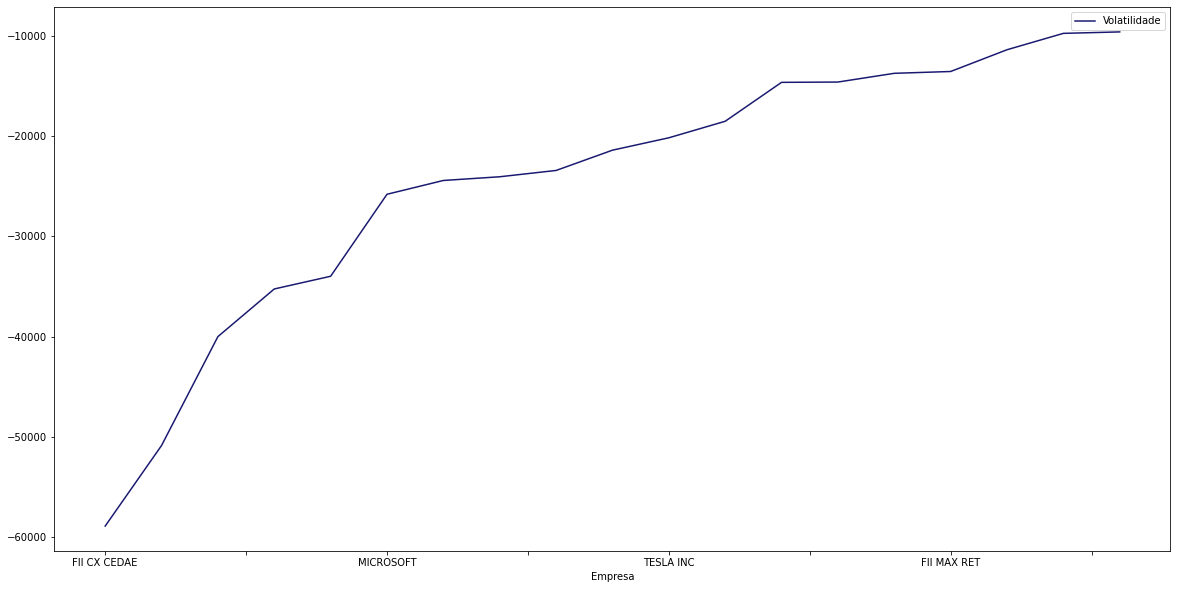

In [63]:
data_2020_lowest.plot(x='Empresa', y='Volatilidade', figsize=(20, 10), color = 'midnightblue') 
plt.savefig('desvalorizou_empresa_2020.png', ddp=300)

## Analisando a variância da FII CX CEDAE em 2020

In [64]:
data_cedae = data_2020_lowest[data_2020_lowest['Empresa'].str.contains('FII CX CEDAE')]
data_cedae = data_cedae.nsmallest(1, 'Volatilidade')
data_cedae = data_cedae.drop(['Segmento', 'Volatilidade'], axis=1)
data_cedae.head()

,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
1340,FII CX CEDAE,61000.23,46908.94,46742.35,44716.88,47543.35,51721.94,33536.21,2069.86,2104.05,2169.73,2125.53,2085.83


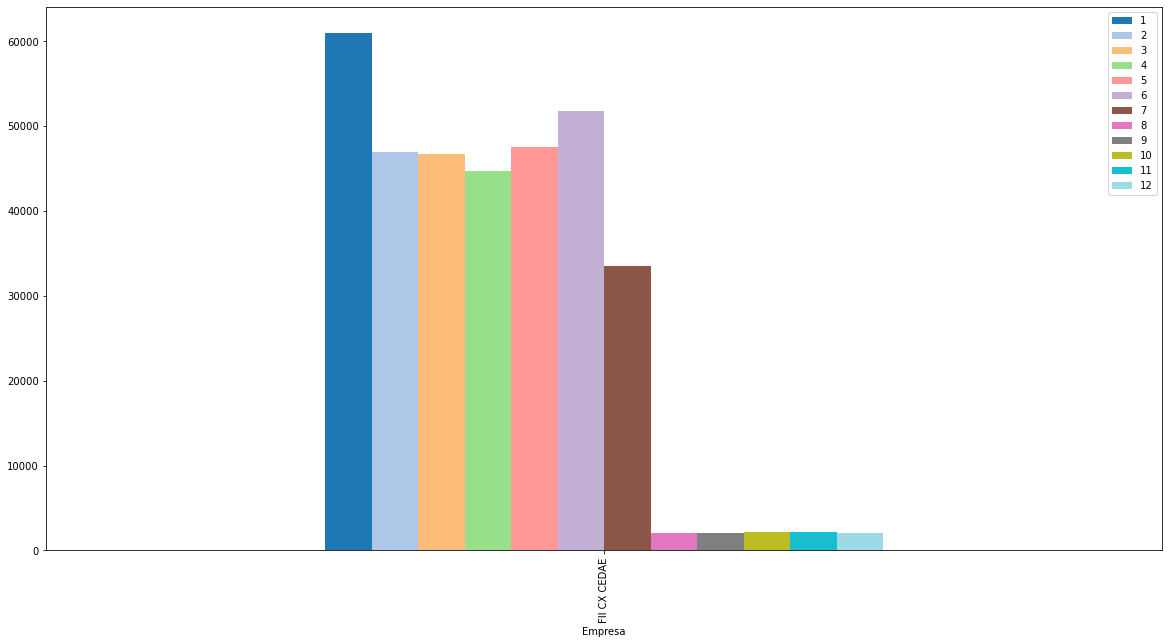

In [65]:
fig, ax = plt.subplots(figsize=(20,10))
data_cedae.plot.bar(x='Empresa', ax=ax, colormap='tab20')
plt.savefig('variancia_cedae_2020.png', ddp=300)

## Analisando qual empresa mais valorizou em 2020

In [66]:
data_2020_largest = data_2020.nlargest(20, 'Volatilidade')
data_2020_largest.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
412,BDR,FEDEX CORP,1238.16,1324.69,2263.04,2713.46,5393.29,4931.94,2550.00,8673.68,23372.64,32257.52,30223.89,26351.42,25113.26
159,BDR,BAIDU INC,554.29,1083.35,NaN,1596.01,2948.75,4922.10,6574.16,6113.62,7344.76,11729.27,15320.22,17372.88,16818.59
1547,Fundo Imobiliário,FIP IE III,1601.01,14104.99,11305.09,9782.02,NaN,2955.00,9325.09,12315.02,6152.13,6066.18,11970.25,15103.86,13502.85
141,BDR,ASML HOLD,11032.39,8044.63,9763.61,13956.00,3527.26,8841.03,3940.62,24854.81,13385.49,12871.60,24927.33,24015.71,12983.32
868,BDR,TARGET CORP,6324.03,7507.26,9327.86,9491.73,10645.76,11183.67,11499.72,17784.60,17764.77,16289.89,14393.93,17915.97,11591.94


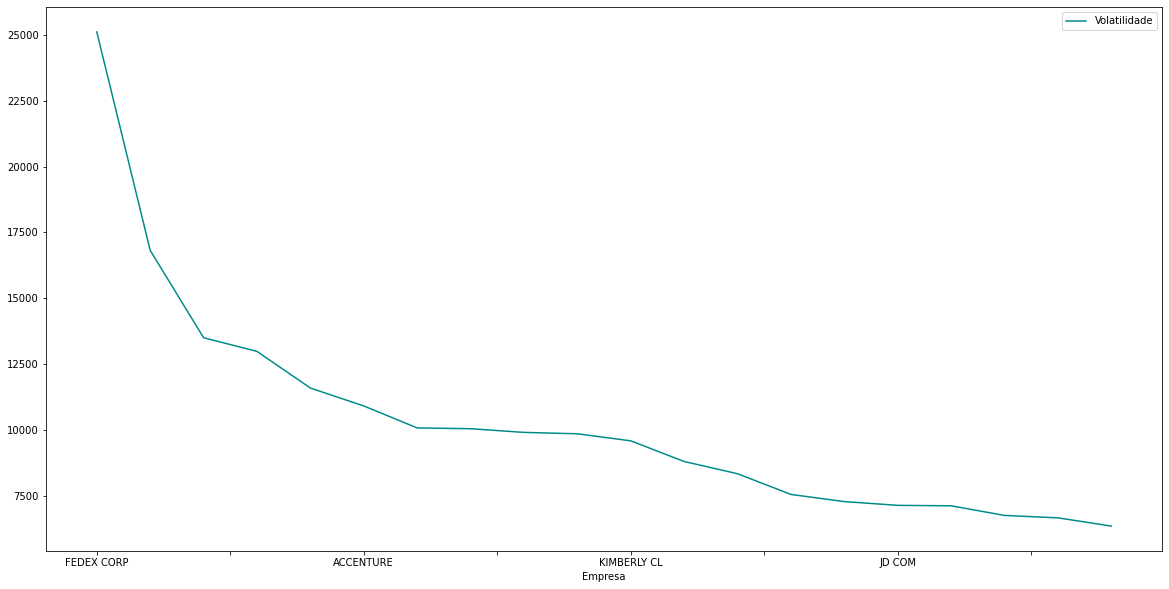

In [67]:
data_2020_largest.plot(x='Empresa', y='Volatilidade', figsize=(20, 10), color = 'darkcyan') 
plt.savefig('valorizou_empresa_2020.png', ddp=300)

## Analisando a variância da FEDEX em 2020

In [68]:
data_fedex = data_2020_largest[data_2020_largest['Empresa'].str.contains("FEDEX CORP")]
data_fedex = data_fedex.nlargest(1, 'Volatilidade')
data_fedex = data_fedex.drop(['Segmento', 'Volatilidade'], axis=1)
data_fedex.head()

,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
412,FEDEX CORP,1238.16,1324.69,2263.04,2713.46,5393.29,4931.94,2550.0,8673.68,23372.64,32257.52,30223.89,26351.42


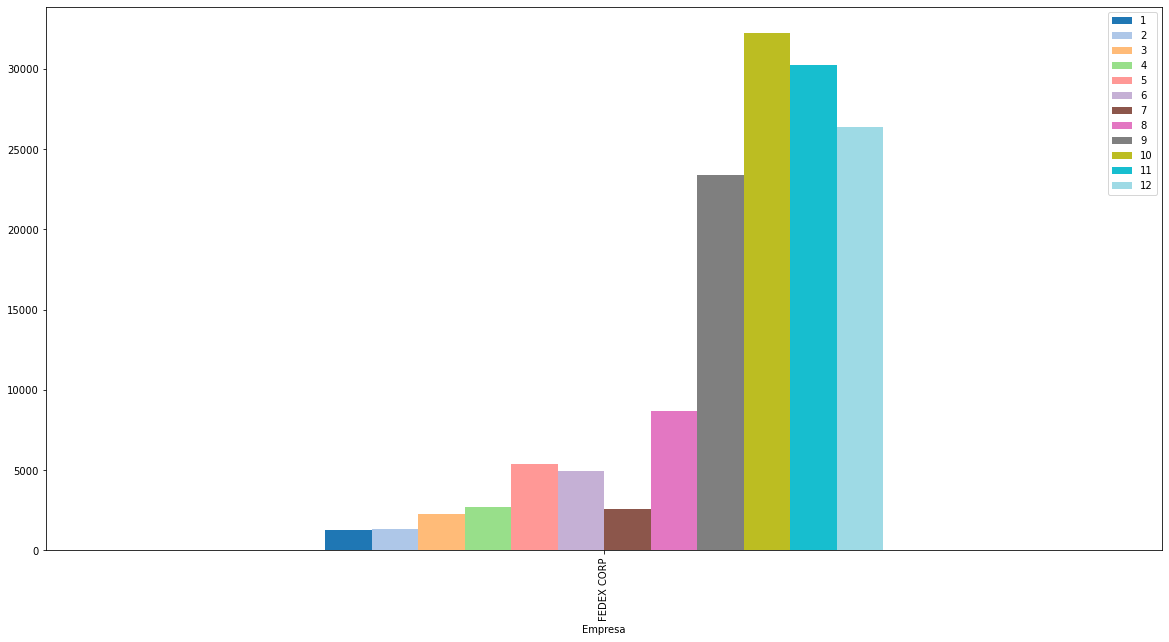

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
data_fedex.plot.bar(x='Empresa', ax=ax, colormap='tab20')
plt.savefig('variancia_fedex_2020.png', ddp=300)

## Analisando segmentos que mais valorizaram em 2020

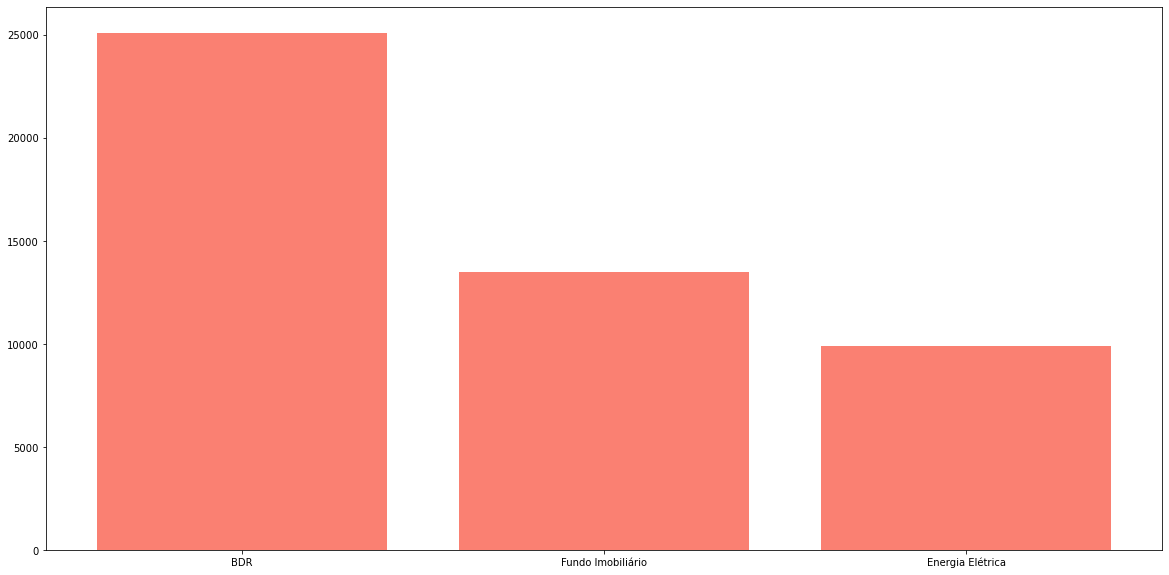

In [70]:
segmento = data_2020_largest['Segmento']
volatilidade = data_2020_largest['Volatilidade']

fig = plt.figure(figsize =(20, 10))
plt.bar(segmento[0:20], volatilidade[0:20],facecolor = 'salmon')
plt.savefig('valorizou_setor_2020.png', ddp=300)
plt.show()

## Analisando segmentos que mais desvalorizaram em 2020

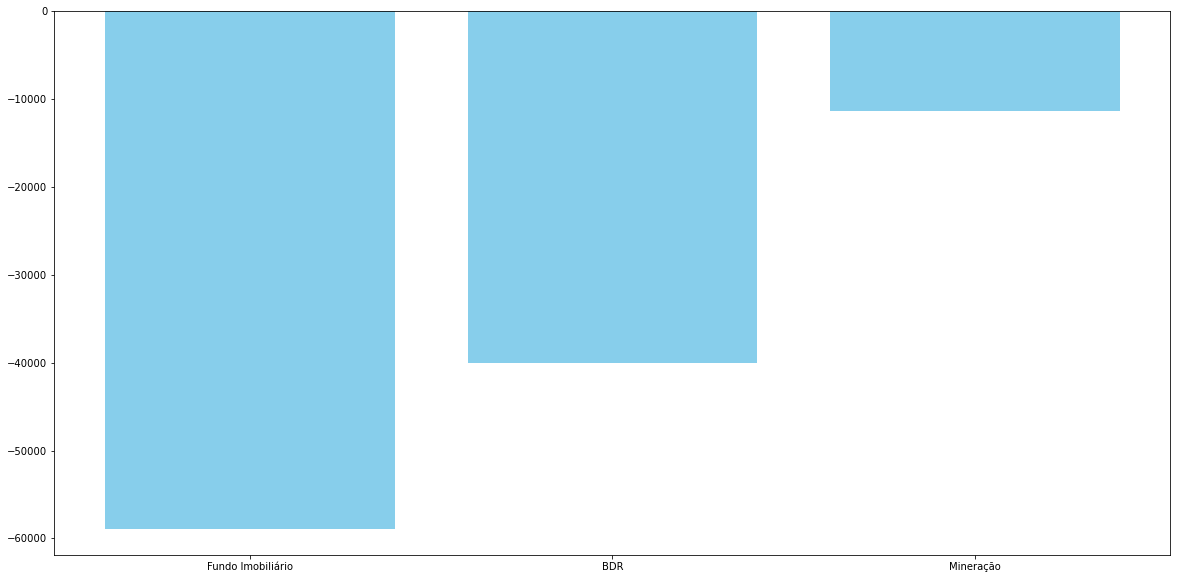

In [71]:
segmento = data_2020_lowest['Segmento']
volatilidade = data_2020_lowest['Volatilidade']

fig = plt.figure(figsize =(20, 10))
plt.bar(segmento[0:20], volatilidade[0:20], facecolor = 'skyblue')
plt.savefig('desvalorizou_setor_2020.png', ddp=300)
plt.show()

## Correlação 2020

In [72]:
data_2020_cor = data_2020.copy()
data_2020_cor['Segmento'] = data_2020_cor['Segmento'].astype('category').cat.codes
data_2020_cor['Segmento']

0        1
1        1
2        1
3        1
4        1
        ..
3927    86
3928    86
3929    87
3930    87
3931    88
Name: Segmento, Length: 3932, dtype: int8

In [73]:
data_2020_cor['Empresa'] = data_2020_cor['Empresa'].astype('category').cat.codes
data_2020_cor['Empresa']

0       1623
1       1811
2       1812
3       1813
4       1814
        ... 
3927    2078
3928    2090
3929     528
3930    1934
3931      71
Name: Empresa, Length: 3932, dtype: int16

In [74]:
correlations = data_2020_cor.corr()
data_2020_cor.corr()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
Segmento,1.000000,0.055788,0.005435,0.012699,0.014143,0.010699,0.011708,0.013724,0.010326,0.010540,0.009603,0.015419,0.018504,0.016533,-0.036250
Empresa,0.055788,1.000000,0.003760,0.005159,0.003706,0.004134,0.002383,0.004055,0.002982,0.004302,0.002552,0.002467,0.000723,0.001672,0.041521
1,0.005435,0.003760,1.000000,0.997890,0.937181,0.959635,0.998607,0.997490,0.992113,0.998453,0.961732,0.999269,0.771327,0.675496,-0.750502
2,0.012699,0.005159,0.997890,1.000000,0.957394,0.975558,0.994878,0.999654,0.983129,0.994748,0.943328,0.998035,0.755406,0.647515,-0.747977
3,0.014143,0.003706,0.937181,0.957394,1.000000,0.997414,0.925068,0.956809,0.889750,0.924822,0.808614,0.939735,0.636244,0.491033,-0.832342
4,0.010699,0.004134,0.959635,0.975558,0.997414,1.000000,0.949878,0.975151,0.920190,0.949708,0.848695,0.961739,0.602686,0.443184,-0.813350
5,0.011708,0.002383,0.998607,0.994878,0.925068,0.949878,1.000000,0.995510,0.996269,0.999831,0.971166,0.999007,0.566493,0.404635,-0.819980
6,0.013724,0.004055,0.997490,0.999654,0.956809,0.975151,0.995510,1.000000,0.983881,0.995324,0.944444,0.998414,0.577182,0.419594,-0.828420
7,0.010326,0.002982,0.992113,0.983129,0.889750,0.920190,0.996269,0.983881,1.000000,0.996440,0.987789,0.991752,0.524798,0.360675,-0.818853
8,0.010540,0.004302,0.998453,0.994748,0.924822,0.949708,0.999831,0.995324,0.996440,1.000000,0.971476,0.998805,0.537862,0.375159,-0.769481


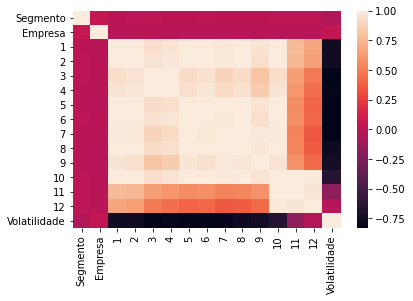

In [75]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlations)
plt.show()

## Classificação 2020

### Naive Bayes Classification Model

In [76]:
data_2020_model = data_2020.copy()
data_2020_model.shape #before removing NaN

(3932, 15)

In [77]:
data_2020_model['Improve'] = np.where(data_2020_model['Volatilidade'] >= 0, True, False)
data_2020_model.dropna(inplace=True)
data_2020_model.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade,Improve
0,Agropecuária,POMIFRUTAS,461.82,178.94,132.53,213.34,181.22,212.72,227.68,192.35,193.88,187.18,200.11,237.63,-224.19,False
1,Agropecuária,SLC AGRICOLA,2771.00,1962.87,1479.26,1609.84,1873.52,2336.17,2497.16,2014.70,1529.36,1929.30,1040.19,1080.84,-1690.16,False
5,Agropecuária,TERRA SANTA,1296.64,897.13,732.79,533.27,581.17,819.61,1181.11,963.10,973.84,837.86,942.20,1547.35,250.71,True
8,Alimentos Processados,BRF SA,5070.09,3773.30,2903.71,2550.49,2900.04,3187.71,4063.70,3801.52,3081.12,3273.98,796.95,883.55,-4186.54,False
13,Alimentos Processados,CAMIL,753.42,529.88,455.60,404.08,478.43,597.16,829.69,772.57,991.88,880.08,461.71,459.10,-294.32,False


In [78]:
data_2020_model.shape #after removing NaN

(639, 16)

In [79]:
X = data_2020_model.iloc[:,0:13].values
X

array([['Agropecuária', 'POMIFRUTAS', 461.82, ..., 193.88, 187.18,
        200.11],
       ['Agropecuária', 'SLC AGRICOLA', 2771.0, ..., 1529.36, 1929.3,
        1040.19],
       ['Agropecuária', 'TERRA SANTA', 1296.64, ..., 973.84, 837.86,
        942.2],
       ...,
       ['Vestuário', 'GUARARAPES', 1895.26, ..., 1131.92, 965.49, 617.16],
       ['Viagens e Lazer', 'CVC BRASIL', 7388.01, ..., 2816.31, 2000.71,
        759.17],
       ['Viagens e Lazer', 'TIME FOR FUN', 379.26, ..., 176.22, 137.76,
        107.23]], dtype=object)

In [80]:
y = data_2020_model.loc[:,'Improve'].values
y

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
        True,  True, False, False,  True, False, False,  True,  True,
        True, False,  True, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,

In [81]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
#creating labelEncoder
le = LabelEncoder()
# Converting string labels into numbers.
y = le.fit_transform(y)
y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [82]:
X[:,0] = le.fit_transform(X[:,0])
X

array([[0, 'POMIFRUTAS', 461.82, ..., 193.88, 187.18, 200.11],
       [0, 'SLC AGRICOLA', 2771.0, ..., 1529.36, 1929.3, 1040.19],
       [0, 'TERRA SANTA', 1296.64, ..., 973.84, 837.86, 942.2],
       ...,
       [70, 'GUARARAPES', 1895.26, ..., 1131.92, 965.49, 617.16],
       [71, 'CVC BRASIL', 7388.01, ..., 2816.31, 2000.71, 759.17],
       [71, 'TIME FOR FUN', 379.26, ..., 176.22, 137.76, 107.23]],
      dtype=object)

In [83]:
X[:,1] = le.fit_transform(X[:,1])
X

array([[0, 525, 461.82, ..., 193.88, 187.18, 200.11],
       [0, 565, 2771.0, ..., 1529.36, 1929.3, 1040.19],
       [0, 588, 1296.64, ..., 973.84, 837.86, 942.2],
       ...,
       [70, 383, 1895.26, ..., 1131.92, 965.49, 617.16],
       [71, 133, 7388.01, ..., 2816.31, 2000.71, 759.17],
       [71, 594, 379.26, ..., 176.22, 137.76, 107.23]], dtype=object)

### Let's go to split the dataset into Training and Test set with 70:30 ratio

In [84]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13) # 70% training and 30% test

In [85]:
#Feature scaling to the training and test set of independent variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()
# or scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
#Train the model using the training sets
model.fit(X_train, y_train)
GaussianNB(priors = None)
#Predict the response for test dataset
y_pred = model.predict(X_test) # y_pred holds the predicted label of our test set.

### Let's see the accuracy of our estimator.

In [87]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7135416666666666


In [88]:
y_pred_train = model.predict(X_train)

y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7584


In [89]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.7584
Test set score: 0.7135


In [90]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[133  13]
 [ 42   4]]

True Positives(TP) =  133

True Negatives(TN) =  4

False Positives(FP) =  13

False Negatives(FN) =  42


### 133 + 4 = 137 correct predictions
### 13 + 42 = 55 incorrect predictions

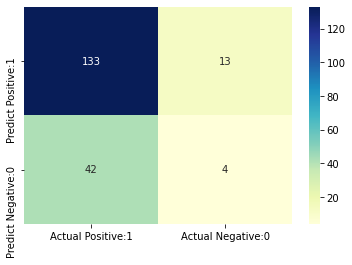

In [91]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('confusion_matriz_2020.png', ddp=300)